In [1]:
from agents import ConsumerProducer, Influencer, ImperfectConsumerProducer
from content_market import ContentMarket
import numpy as np
from stats import TestStats

In [2]:
num_influencers = 1
num_consumer_producers = 10

production_rate = 1
external_production_rate = 1

topics = [[-1, 1]]
topics = np.array(topics)

In [3]:
content_market = ContentMarket(topics, production_rate, external_production_rate)

In [4]:
from util import exponential_decay, inverse_decay, tanh_decay

In [5]:
agent_colors = dict()

for i in range(num_consumer_producers):
    cons_func = lambda x: inverse_decay(x, 1, 2)
    prod_func = lambda x: inverse_decay(x, 1, 2)
    consumer_producer = ConsumerProducer(prod_func, cons_func, 30, 5, 0.57, init_following_rates_method='equal')
    #consumer_producer = ImperfectConsumerProducer(prod_func, cons_func, 10, 3, 1, init_following_rates_method='equal')
    content_market.add_agent(consumer_producer)

    color = np.random.rand(3,)
    agent_colors[consumer_producer.index] = color

for i in range(num_influencers):
    influencer = Influencer(60, 1, init_following_rates_method='equal')
    content_market.add_agent(influencer)

    color = np.random.rand(3,)
    agent_colors[influencer.index] = color

In [6]:
import matplotlib.pyplot as plt
import visualize

In [7]:
content_market.finalize(method='even')

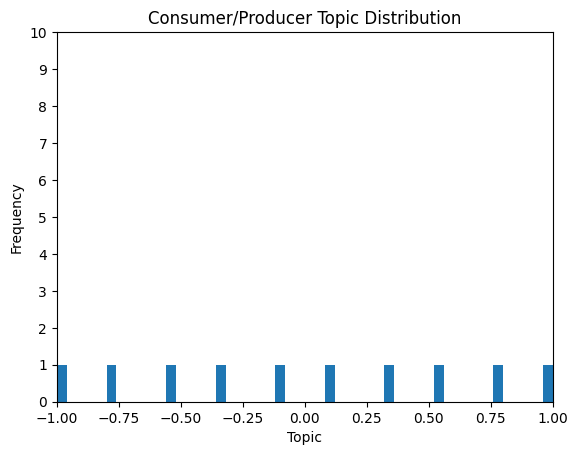

In [8]:
visualize.plot_topic_distribution_histogram("Consumer/Producer Topic Distribution", content_market.consumers, -1, 1)

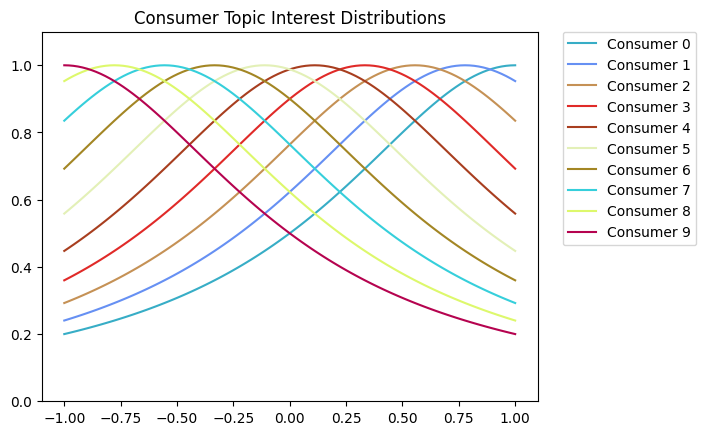

In [9]:
visualize.plot_consumer_topic_interest_distributions("Consumer Topic Interest Distributions", content_market.consumers, -1, 1, agent_colors)

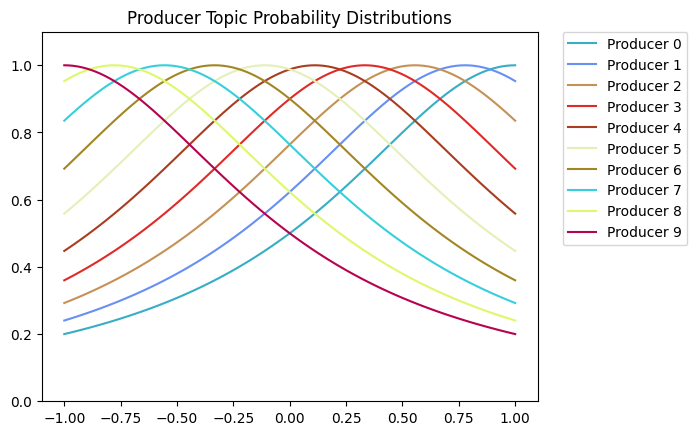

In [10]:
visualize.plot_producer_topic_probability_distributions("Producer Topic Probability Distributions", content_market.producers, -1, 1, agent_colors)

In [11]:
stats: TestStats = content_market.optimize(100)

Optimizing consumer 0
Optimizing consumer 1
Optimizing consumer 2
Optimizing consumer 3
Optimizing consumer 4
Optimizing consumer 5
Optimizing consumer 6
Optimizing consumer 7
Optimizing consumer 8
Optimizing consumer 9
Optimizing influencer 10
Optimizing producer 0
Optimization succeeded (overall 0.004425875027664006s): nit=4, nfev=12, njev=6.
Optimizing producer 1
Optimization succeeded (overall 0.004314832971431315s): nit=4, nfev=12, njev=6.
Optimizing producer 2
Optimization succeeded (overall 0.004174542031250894s): nit=4, nfev=12, njev=6.
Optimizing producer 3
Optimization succeeded (overall 0.0032155420631170273s): nit=3, nfev=10, njev=5.
Optimizing producer 4
Optimization succeeded (overall 0.005090415943413973s): nit=3, nfev=10, njev=5.
Optimizing producer 5
Optimization succeeded (overall 0.004777541966177523s): nit=3, nfev=10, njev=5.
Optimizing producer 6
Optimization succeeded (overall 0.0032743329647928476s): nit=3, nfev=10, njev=5.
Optimizing producer 7
Optimization succ

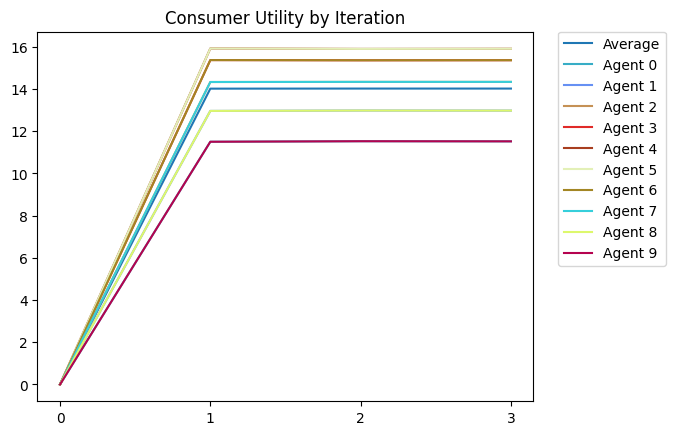

In [12]:
visualize.plot_agent_utility_by_iteration("Consumer Utility by Iteration", content_market.consumers, agent_colors, stats.consumer_stats, stats.average_consumer_utility)

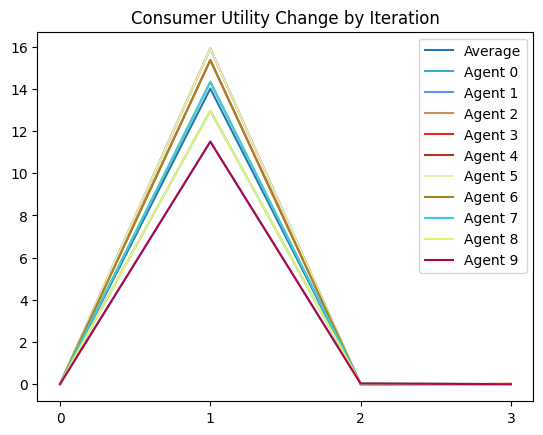

In [13]:
visualize.plot_agent_utility_change_by_iteration("Consumer Utility Change by Iteration", content_market.consumers, agent_colors, stats.consumer_stats, stats.average_consumer_utility_change)

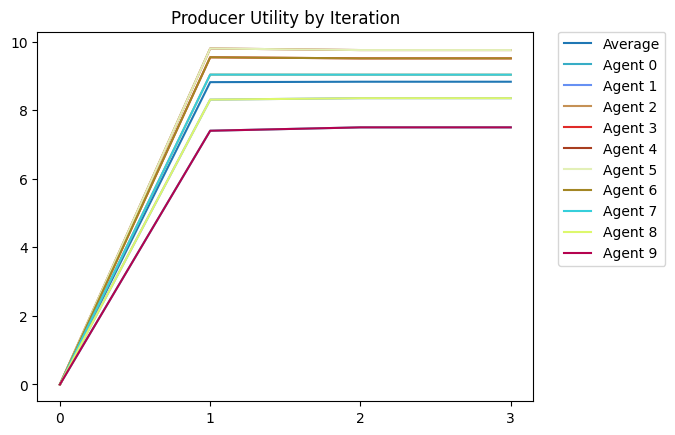

In [14]:
visualize.plot_agent_utility_by_iteration("Producer Utility by Iteration", content_market.producers, agent_colors, stats.producer_stats, stats.average_producer_utility)

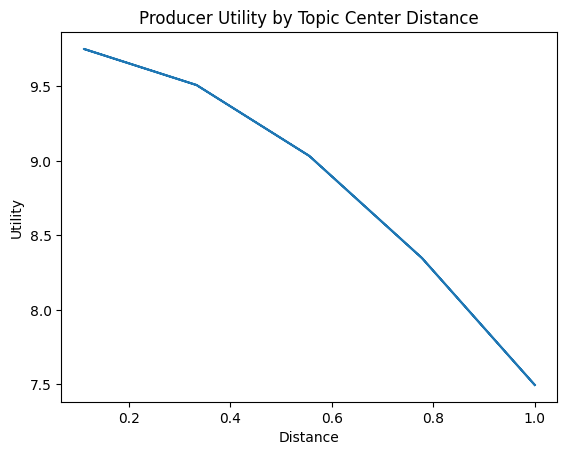

In [15]:
plt.figure()
plt.title('Producer Utility by Topic Center Distance')
topic_center = [(content_market.topics_bounds[i][0] + content_market.topics_bounds[i][1]) / 2 for i in range(len(content_market.topics_bounds))]
distances = []
utilities = []
for producer in content_market.producers:
    main_interest = producer.main_interest
    distance = np.linalg.norm(main_interest - topic_center)
    distances.append(distance)
    utilities.append(stats.producer_stats[producer.index].utilities[-1])
plt.plot(distances, utilities)
plt.xlabel('Distance')
plt.ylabel('Utility')
plt.show()

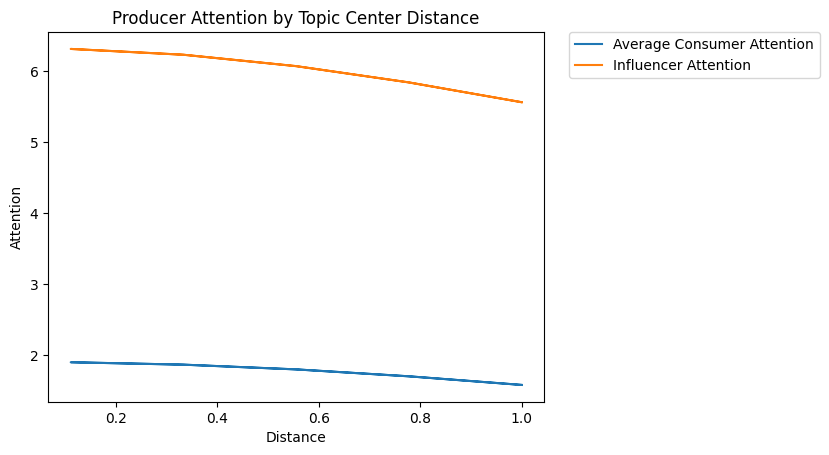

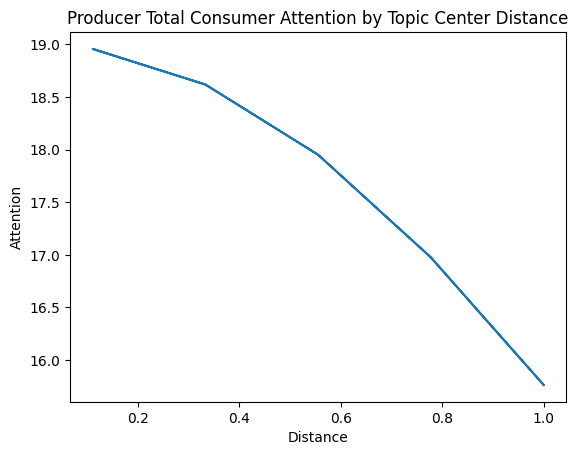

In [16]:

topic_center = [(content_market.topics_bounds[i][0] + content_market.topics_bounds[i][1]) / 2 for i in range(len(content_market.topics_bounds))]
distances = []
avg_consumer_attentions = []
total_consumer_attentions = []
influencer_attentions = []
for producer in content_market.producers:
    main_interest = producer.main_interest
    distance = np.linalg.norm(main_interest - topic_center)
    distances.append(distance)
    influencer_attentions.append(stats.influencer_stats[content_market.influencers[0].index].following_rates[-1][producer.index])
    consumer_attn = 0
    for consumer in content_market.consumers:
        consumer_attn += stats.consumer_stats[consumer.index].following_rates[-1][producer.index]
    avg_consumer_attentions.append(consumer_attn / len(content_market.consumers))
    total_consumer_attentions.append(consumer_attn)
plt.figure()
plt.title('Producer Attention by Topic Center Distance')
plt.plot(distances, avg_consumer_attentions, label='Average Consumer Attention')
plt.plot(distances, influencer_attentions, label='Influencer Attention')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xlabel('Distance')
plt.ylabel('Attention')
plt.show()

plt.figure()
plt.title('Producer Total Consumer Attention by Topic Center Distance')
plt.plot(distances, total_consumer_attentions, label='Total Consumer Attention')
plt.xlabel('Distance')
plt.ylabel('Attention')
plt.show()

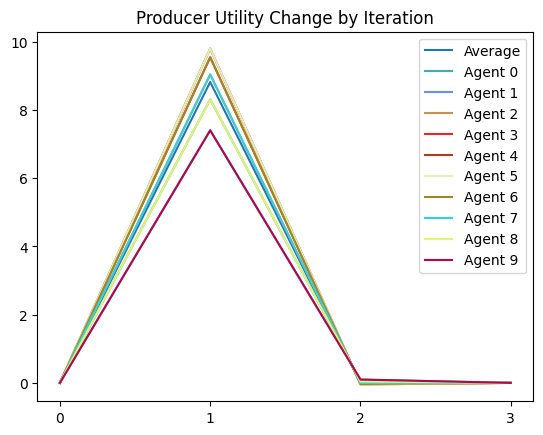

In [17]:
visualize.plot_agent_utility_change_by_iteration("Producer Utility Change by Iteration", content_market.producers, agent_colors, stats.producer_stats, stats.average_producer_utility_change)

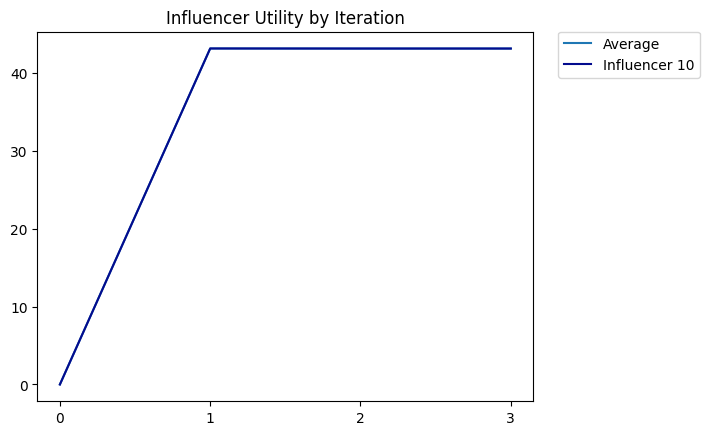

In [18]:
visualize.plot_agent_utility_by_iteration("Influencer Utility by Iteration", content_market.influencers, agent_colors, stats.influencer_stats, stats.average_influencer_utility)

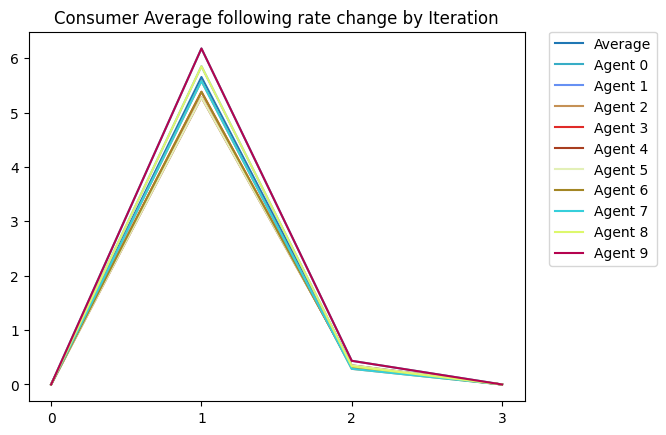

In [19]:
visualize.plot_following_rate_change_by_iteration("Consumer Average following rate change by Iteration", content_market.consumers, agent_colors, stats.consumer_stats, stats.average_consumer_rate_change)

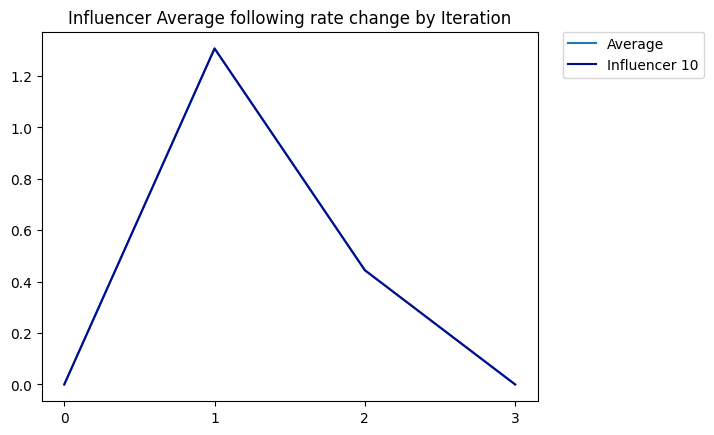

In [20]:
visualize.plot_following_rate_change_by_iteration("Influencer Average following rate change by Iteration", content_market.influencers, agent_colors, stats.influencer_stats, stats.average_influencer_rate_change)

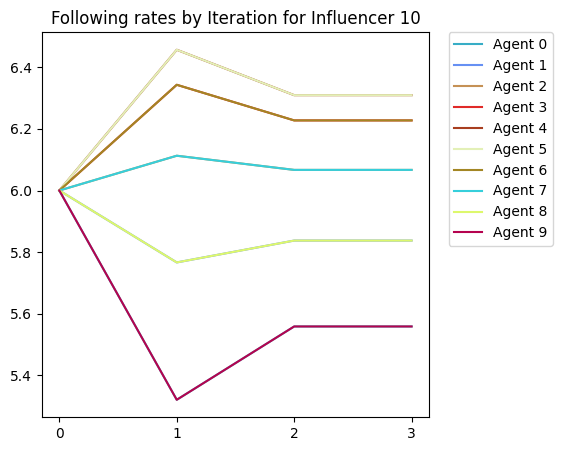

In [21]:
visualize.plot_following_rates_by_iteration(content_market.influencers, content_market.producers, agent_colors, stats.influencer_stats)

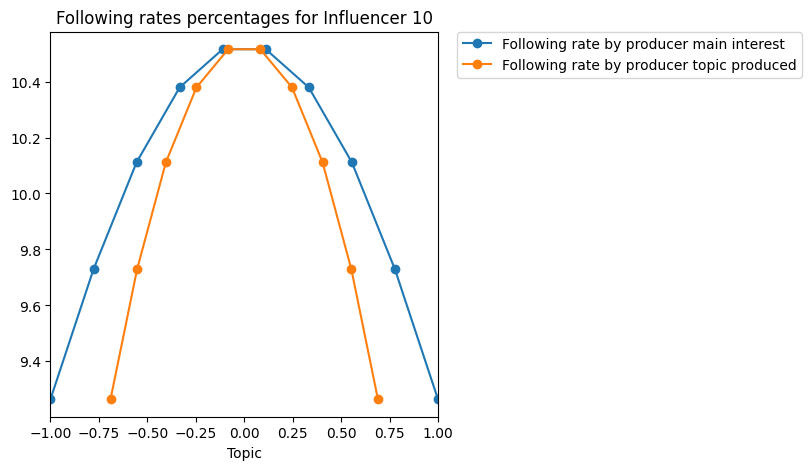

In [22]:
visualize.plot_agent_following_rates(content_market.influencers, stats.influencer_stats, agent_colors)

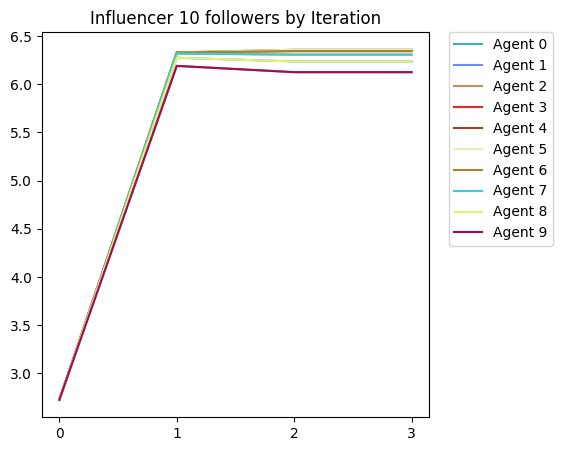

In [23]:
visualize.plot_follows_by_iteration(content_market.influencers, content_market.consumers, agent_colors, stats.consumer_stats)

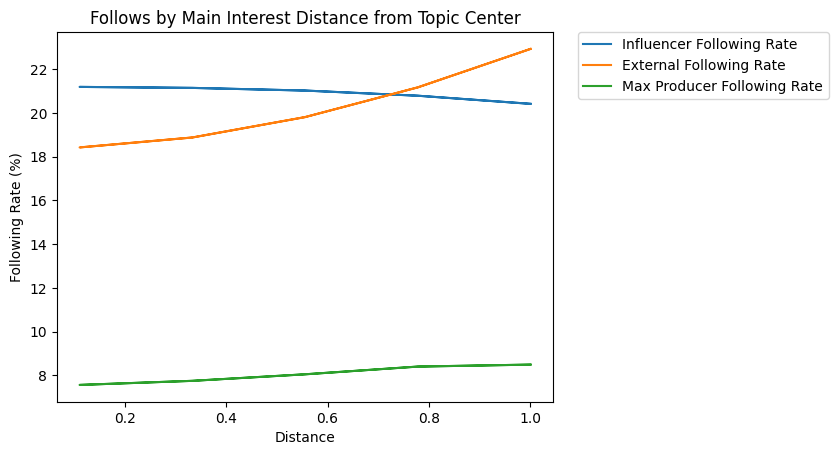

In [24]:
plt.figure()
plt.title('Follows by Main Interest Distance from Topic Center')
topic_center = [(content_market.topics_bounds[i][0] + content_market.topics_bounds[i][1]) / 2 for i in range(len(content_market.topics_bounds))]
distances = []
influencer_rates = []
max_producer_rates = []
total_producer_rates = []
external_rates = []
for consumer in content_market.consumers:
    main_interest = consumer.main_interest
    distance = np.linalg.norm(main_interest - topic_center)
    distances.append(distance)
    influencer_rates.append(stats.consumer_stats[consumer.index].following_rates[-1][content_market.influencers[0].index] / consumer.attention_bound * 100)
    external_rates.append(stats.consumer_stats[consumer.index].following_rates[-1][-1] / consumer.attention_bound * 100)

    max_producer = sorted(content_market.producers, key=lambda x: stats.consumer_stats[consumer.index].following_rates[-1][x.index])[-1]
    max_producer_rates.append(stats.consumer_stats[consumer.index].following_rates[-1][max_producer.index] / consumer.attention_bound * 100)

    total_producer_rate = []
    for producer in content_market.producers:
        total_producer_rate.append(stats.consumer_stats[consumer.index].following_rates[-1][producer.index])
    total_producer_rates.append(sum(total_producer_rate) / consumer.attention_bound * 100)

plt.plot(distances, influencer_rates, label='Influencer Following Rate')
plt.plot(distances, external_rates, label='External Following Rate')
plt.plot(distances, max_producer_rates, label='Max Producer Following Rate')
#plt.plot(distances, total_producer_rates, label='Total Producer Following Rate')
plt.xlabel('Distance')
plt.ylabel('Following Rate (%)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

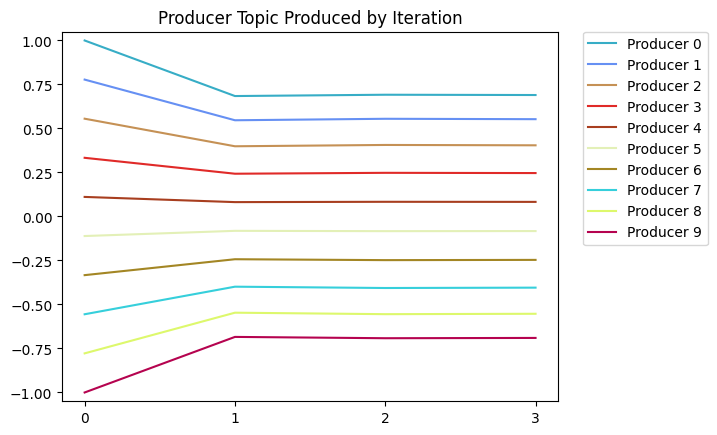

In [25]:
visualize.plot_producer_topic_produced_by_iteration("Producer Topic Produced by Iteration", content_market.producers, content_market.consumers, agent_colors, stats.producer_stats, False)

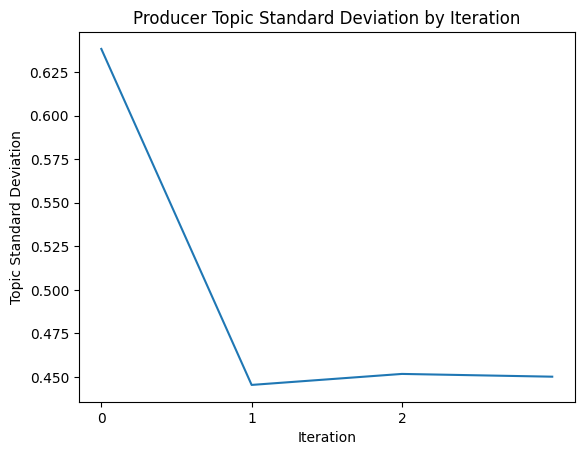

In [26]:
visualize.plot_value_by_iteration("Producer Topic Standard Deviation by Iteration", stats, "producer_topic_standard_deviation", "Topic Standard Deviation")

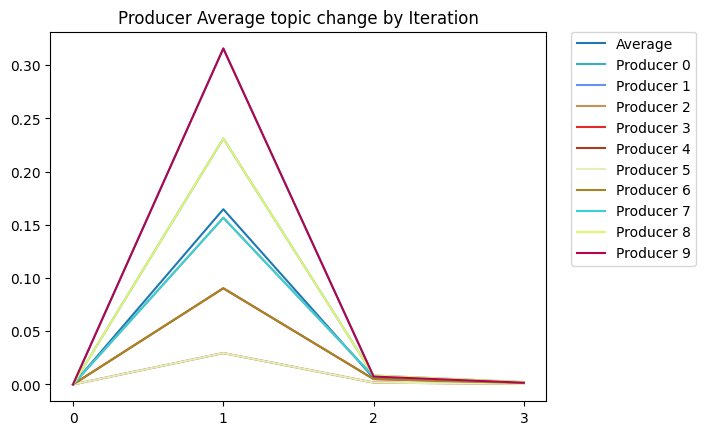

In [27]:
visualize.plot_producer_topic_change_by_iteration("Producer Average topic change by Iteration", content_market.producers, agent_colors, stats.producer_stats, stats.average_producer_topic_change)

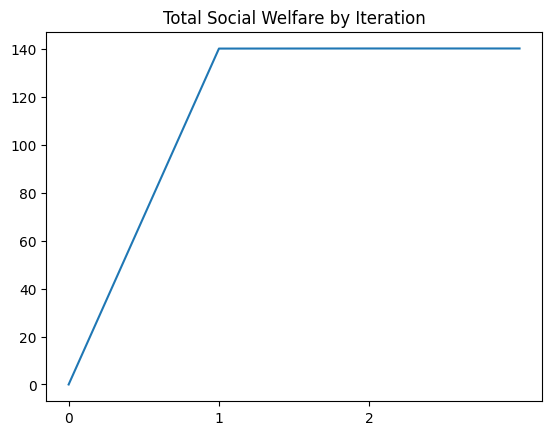

In [28]:
visualize.plot_total_social_welfare_by_iteration("Total Social Welfare by Iteration", stats)

In [29]:
import importlib
importlib.reload(visualize)

<module 'visualize' from '/Users/gabeguralnick/git/content-market-experiment/visualize.py'>

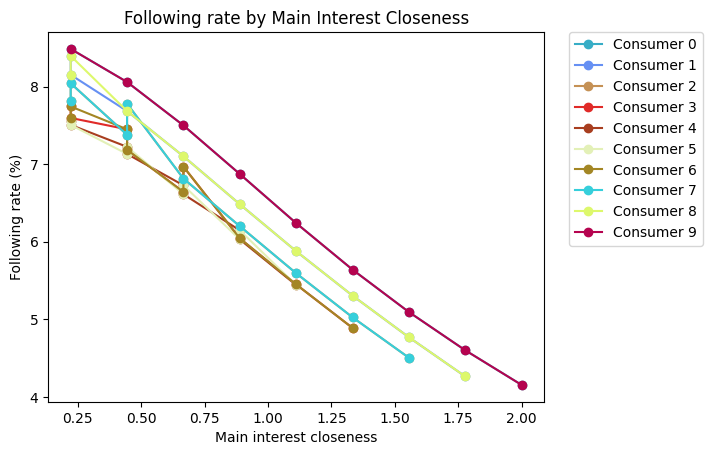

In [30]:
visualize.plot_following_rate_by_main_interest_closeness("Following rate by Main Interest Closeness", content_market.consumers, content_market.producers, agent_colors, stats.consumer_stats)

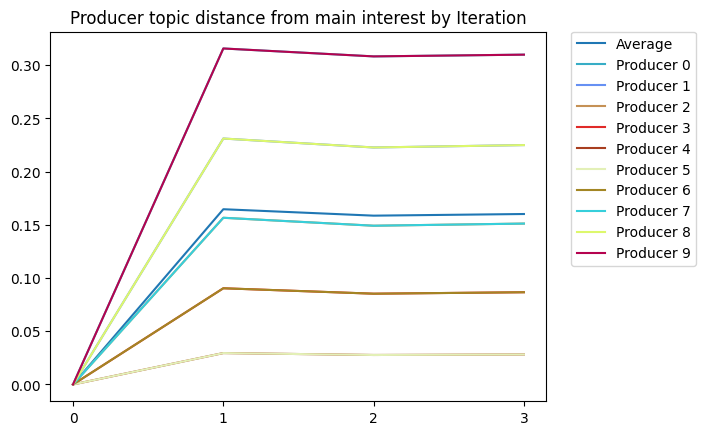

In [31]:
visualize.plot_producer_topic_distance_from_main_interest_by_iteration("Producer topic distance from main interest by Iteration", content_market.producers, agent_colors, stats.producer_stats, stats.average_producer_topic_distance_from_main_interest)

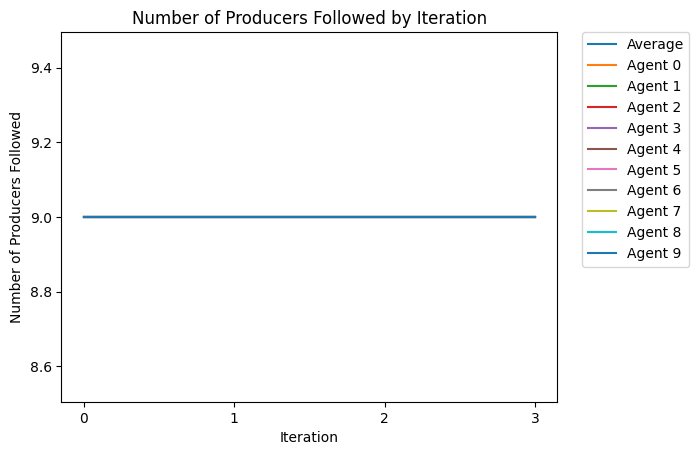

In [32]:
visualize.plot_value_by_agent_by_iteration("Number of Producers Followed by Iteration", stats.consumer_stats, "num_producers_followed", "Number of Producers Followed", stats.average_consumer_num_producers_followed)

[[ 1. nan]
 [nan nan]]


/Users/gabeguralnick/git/content-market-experiment/venv/lib/python3.10/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/gabeguralnick/git/content-market-experiment/venv/lib/python3.10/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


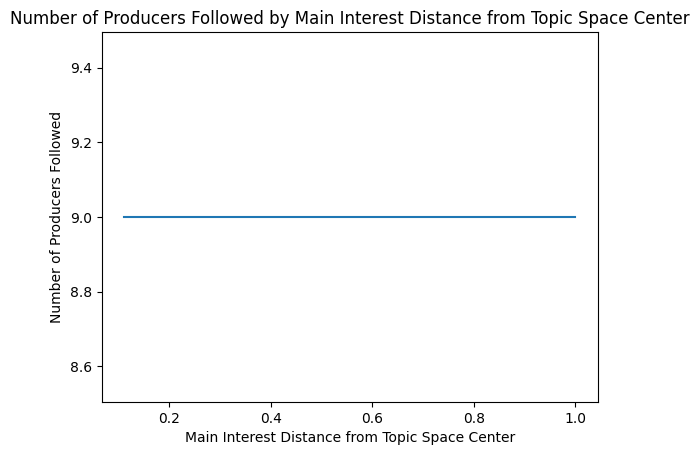

In [33]:
num_prods_by_main_interest_magnitude = []
topic_center = np.array([(bound[0] + bound[1]) / 2 for bound in content_market.topics_bounds])

for consumer in content_market.consumers:
    main_interest_mag = np.linalg.norm(consumer.main_interest - topic_center)
    num_prods_by_main_interest_magnitude.append((main_interest_mag, stats.consumer_stats[consumer.index].num_producers_followed[-1]))

num_prods_by_main_interest_magnitude.sort(key=lambda x: x[0])
print(np.corrcoef([x[0] for x in num_prods_by_main_interest_magnitude], [x[1] for x in num_prods_by_main_interest_magnitude]))
plt.figure()
plt.plot([x[0] for x in num_prods_by_main_interest_magnitude], [x[1] for x in num_prods_by_main_interest_magnitude])
plt.xlabel("Main Interest Distance from Topic Space Center")
plt.ylabel("Number of Producers Followed")
plt.title("Number of Producers Followed by Main Interest Distance from Topic Space Center")
plt.show()

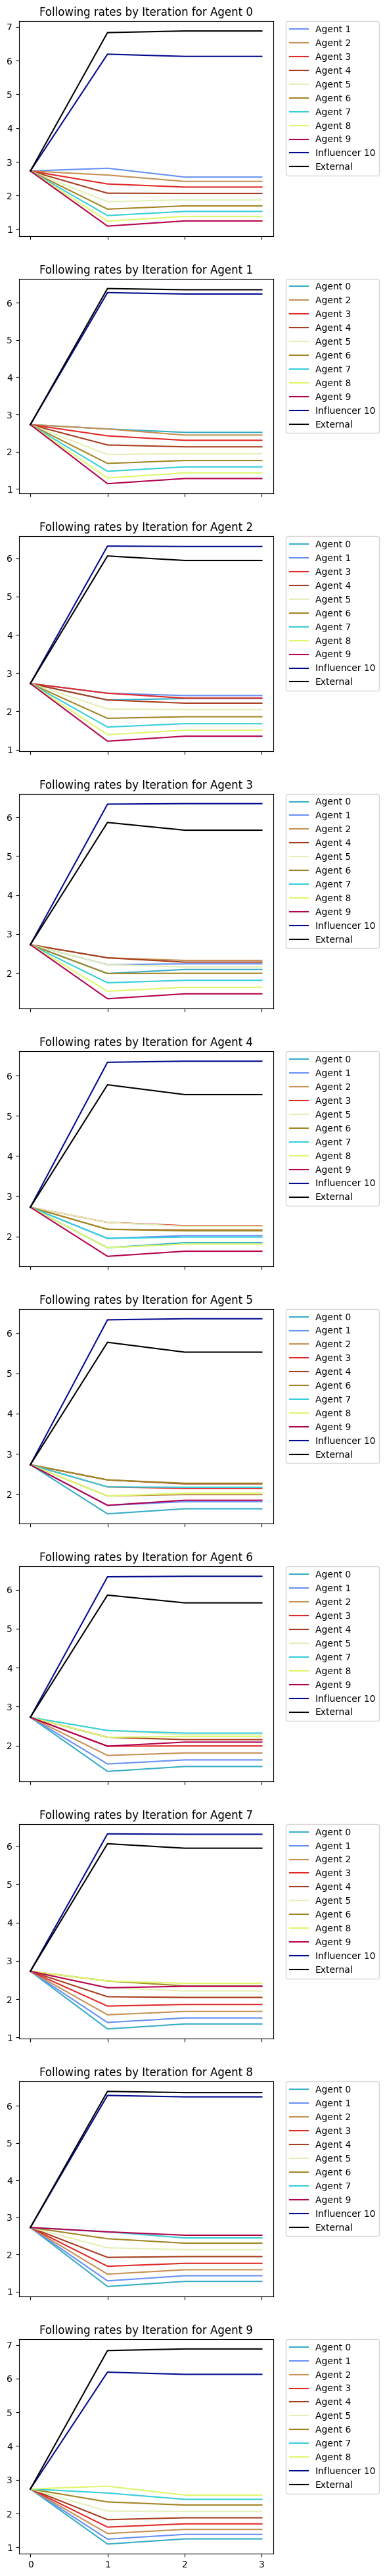

In [34]:
visualize.plot_following_rates_by_iteration(content_market.consumers, sorted(list(set(content_market.producers + content_market.influencers)), key=lambda x: x.index), agent_colors, stats.consumer_stats)

In [35]:
import importlib
importlib.reload(visualize)

<module 'visualize' from '/Users/gabeguralnick/git/content-market-experiment/visualize.py'>

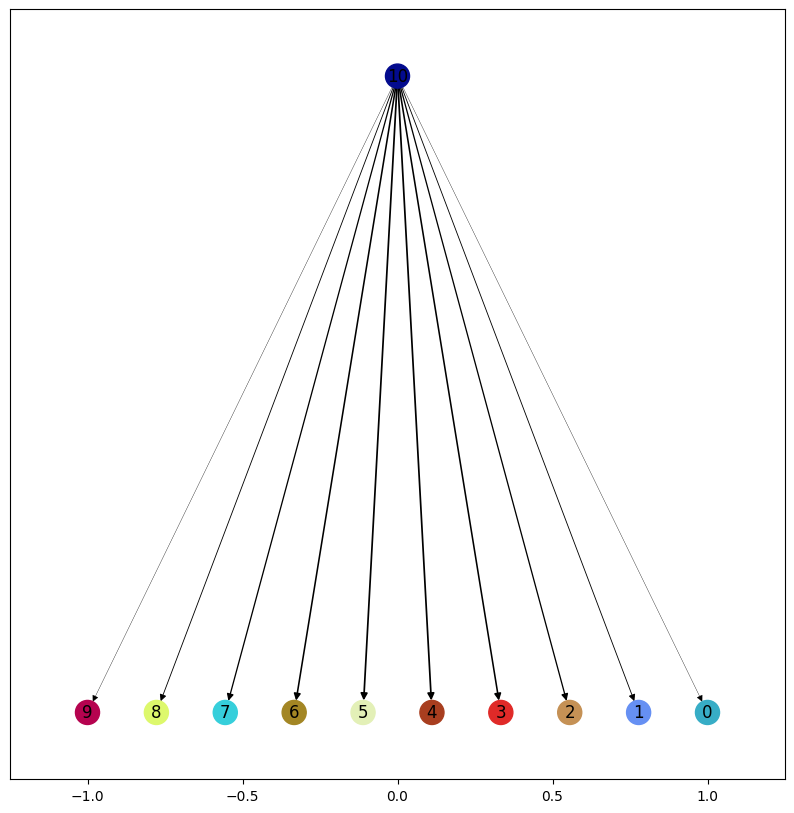

In [36]:
visualize.visualize_influencer(content_market, stats.influencer_stats[content_market.influencers[0].index], agent_colors)

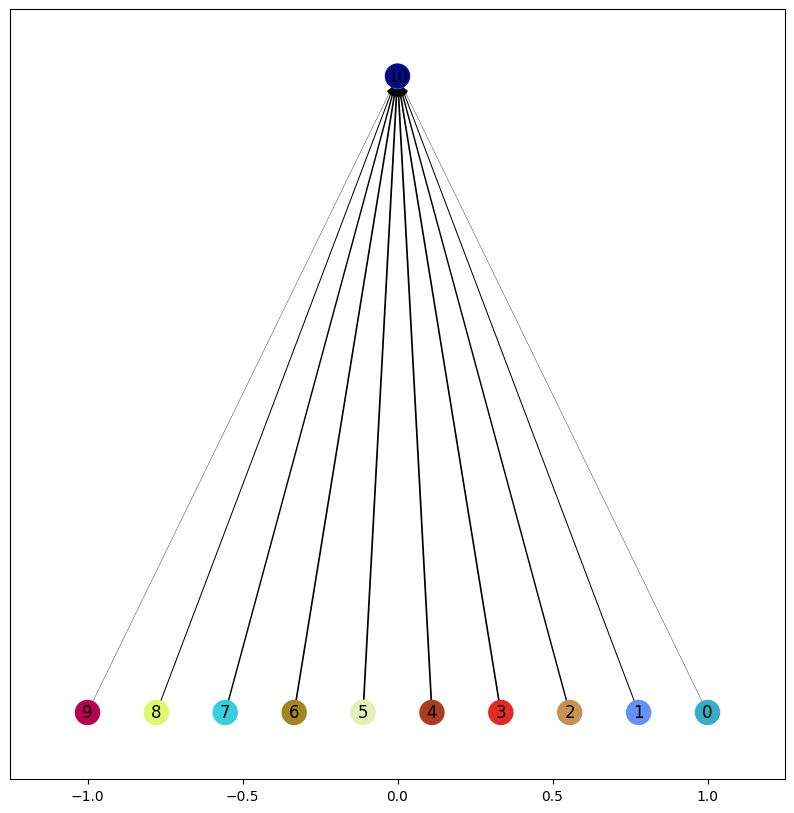

In [37]:
visualize.visualize_influencer_followers(content_market, stats.consumer_stats, agent_colors)

{0: (1.0, 0), 1: (0.7777777777777777, 0), 2: (0.5555555555555554, 0), 3: (0.33333333333333326, 0), 4: (0.11111111111111116, 0), 5: (-0.11111111111111116, 0), 6: (-0.33333333333333337, 0), 7: (-0.5555555555555556, 0), 8: (-0.7777777777777778, 0), 9: (-1.0, 0), 10: (0, 1), 'External': (1, 1)}


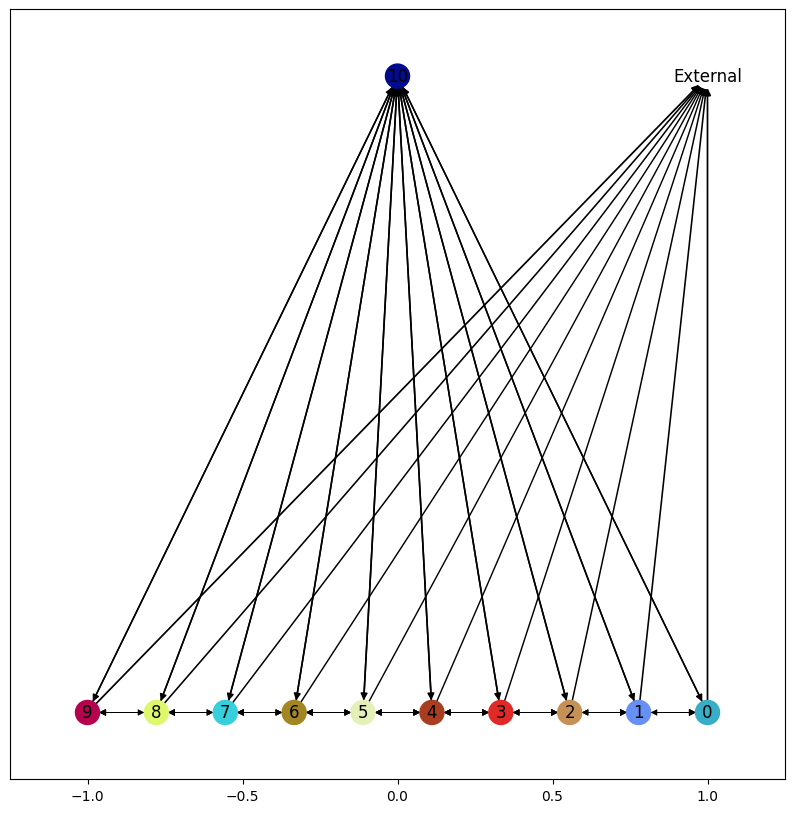

In [38]:
visualize.visualize_market(content_market, stats, agent_colors)

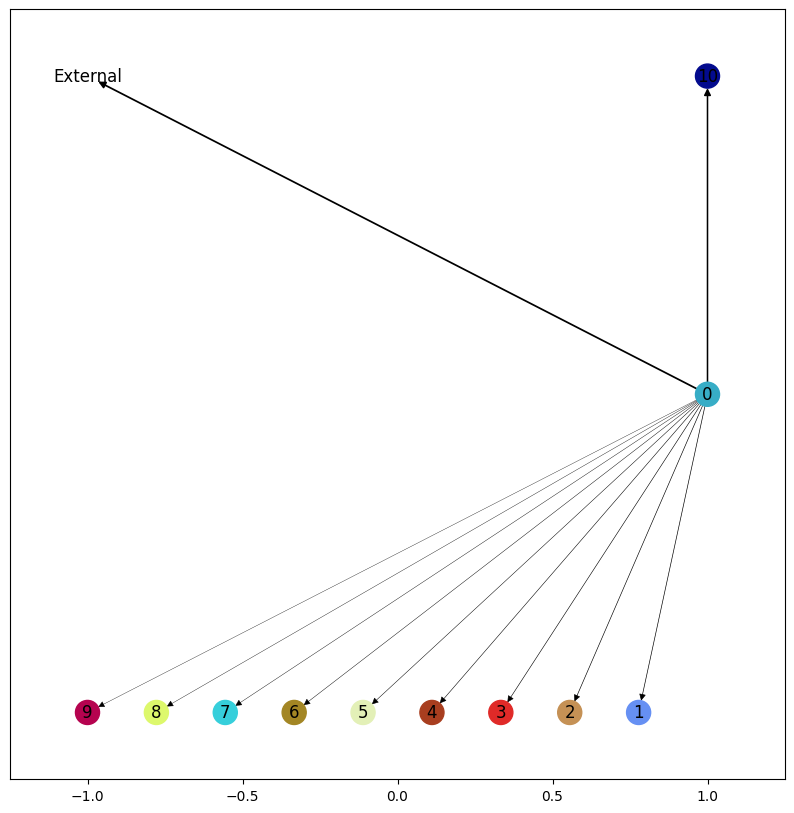

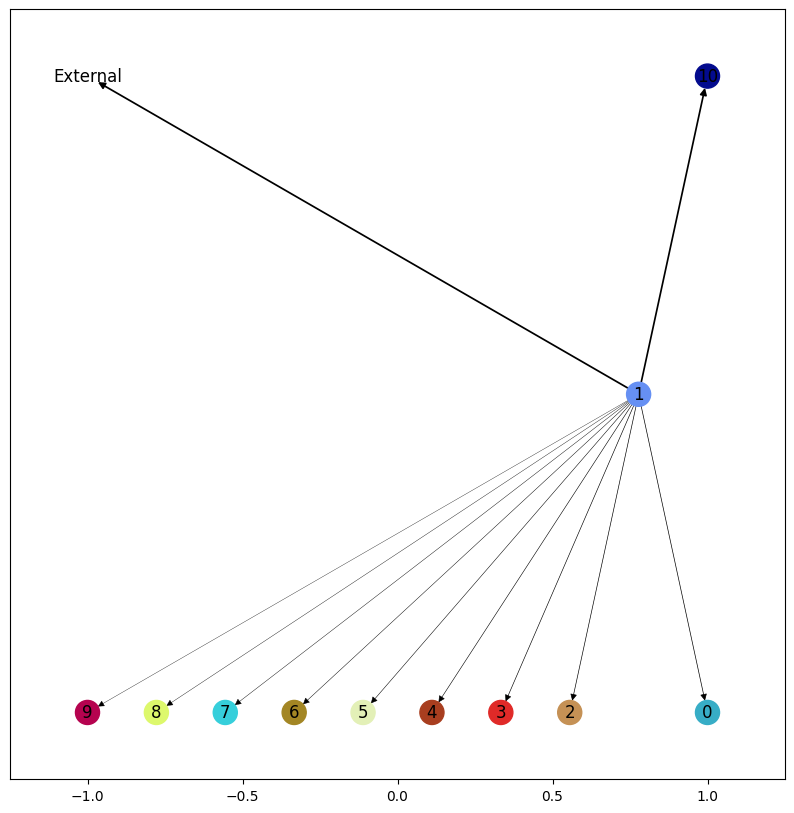

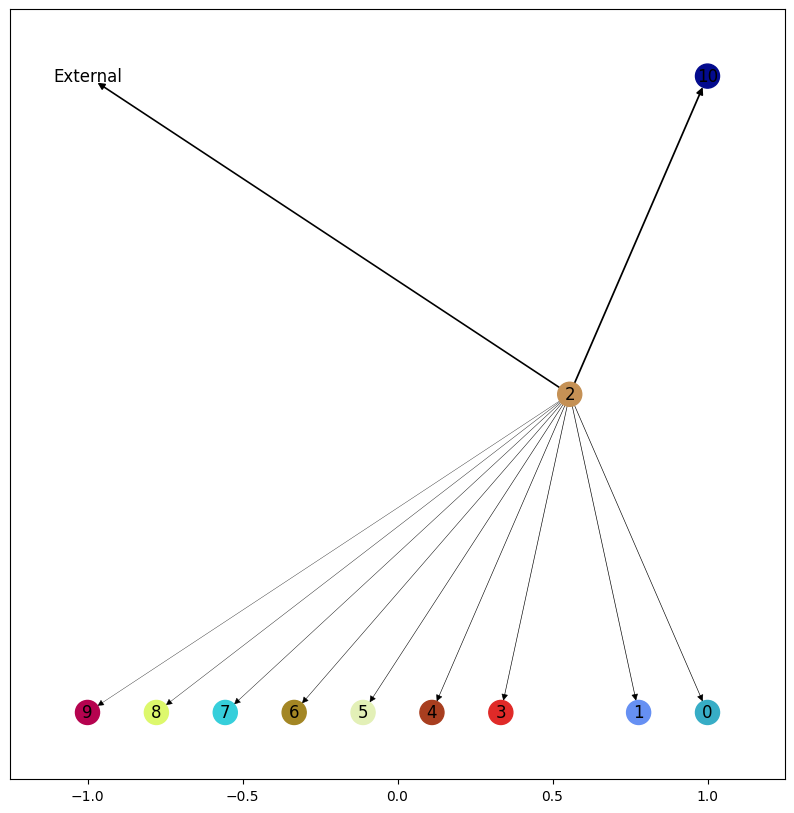

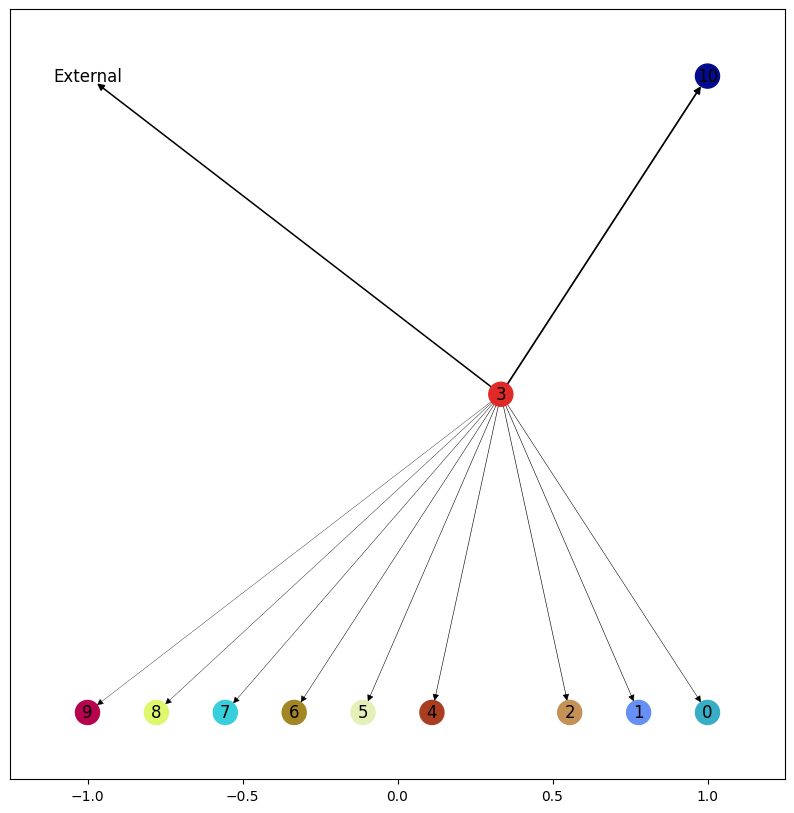

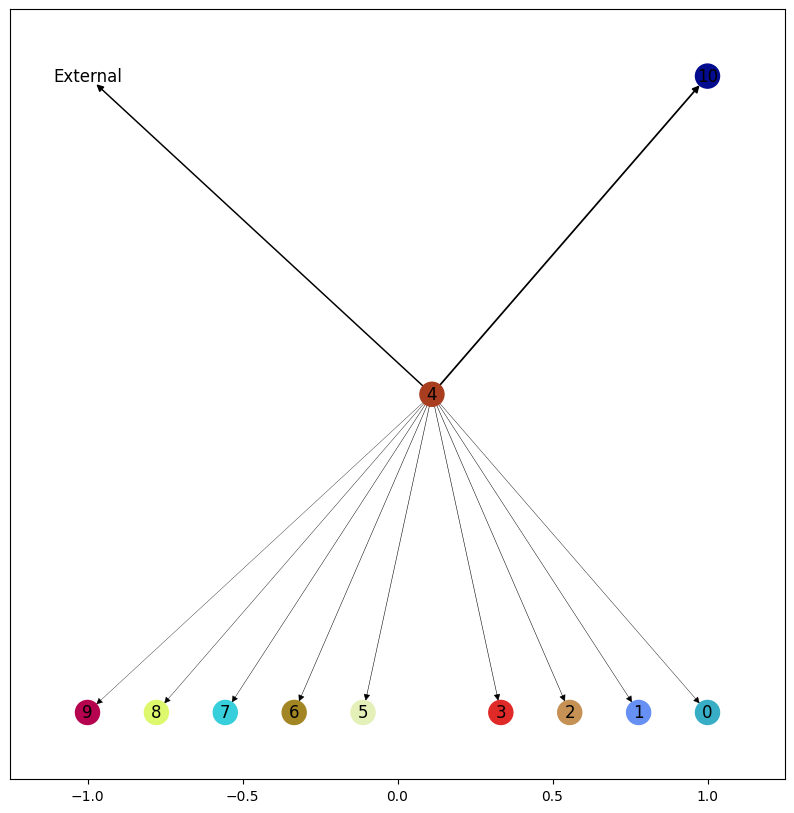

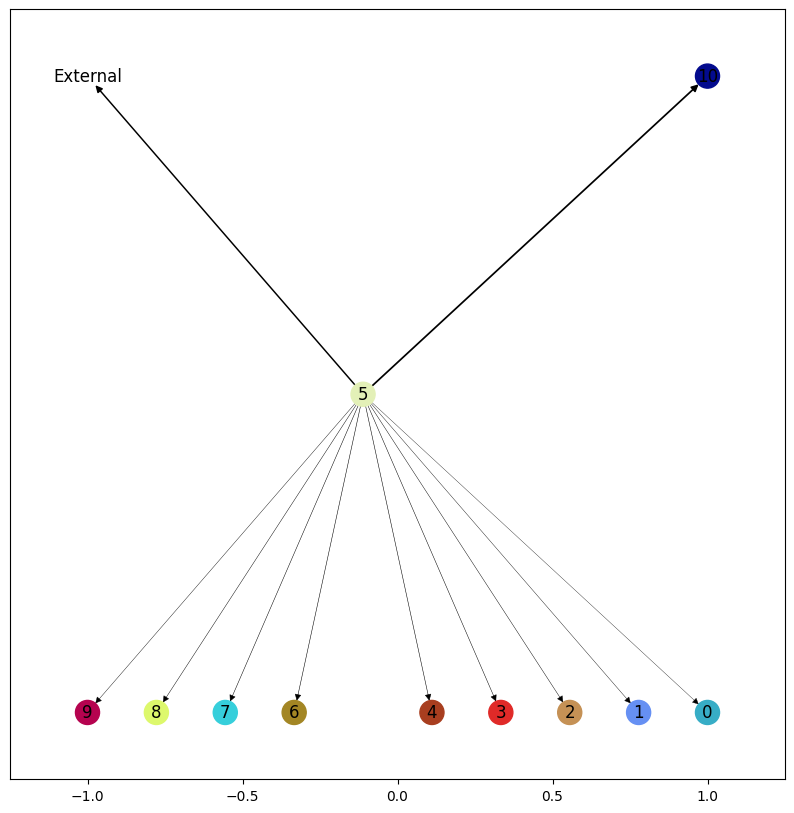

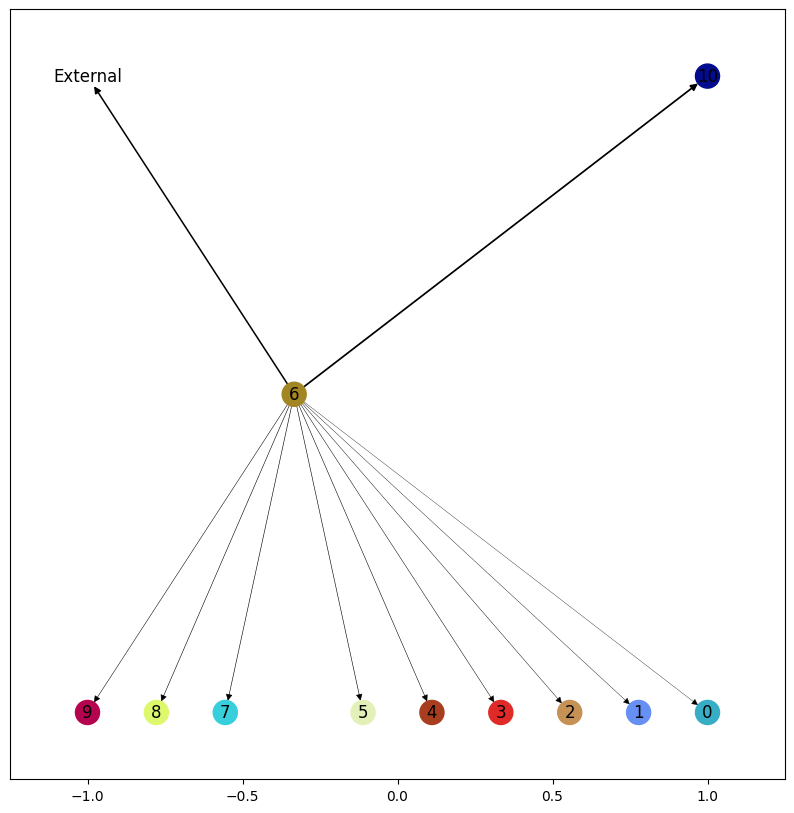

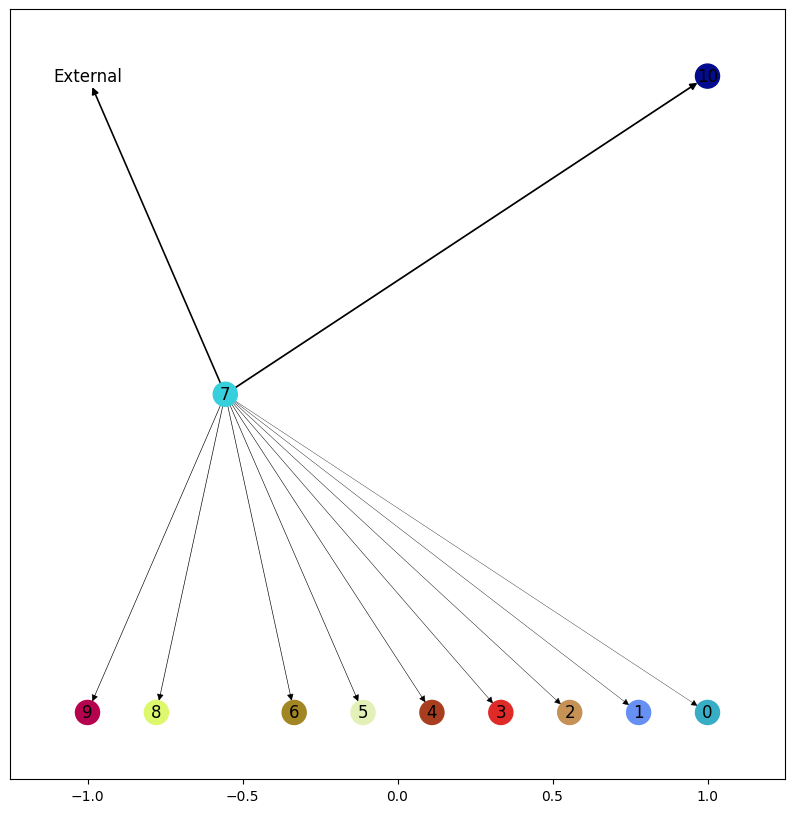

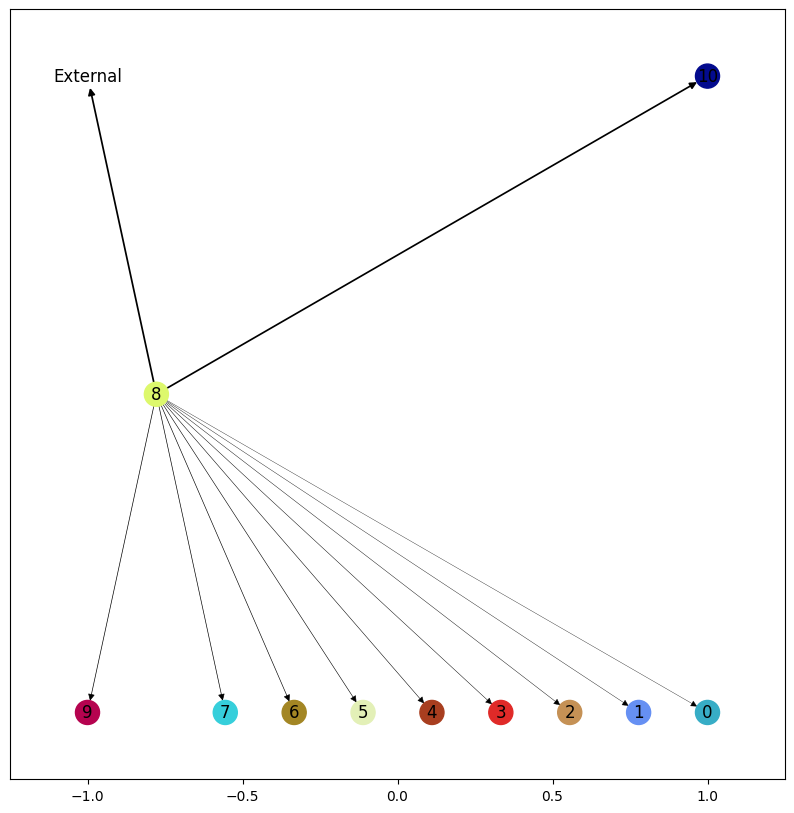

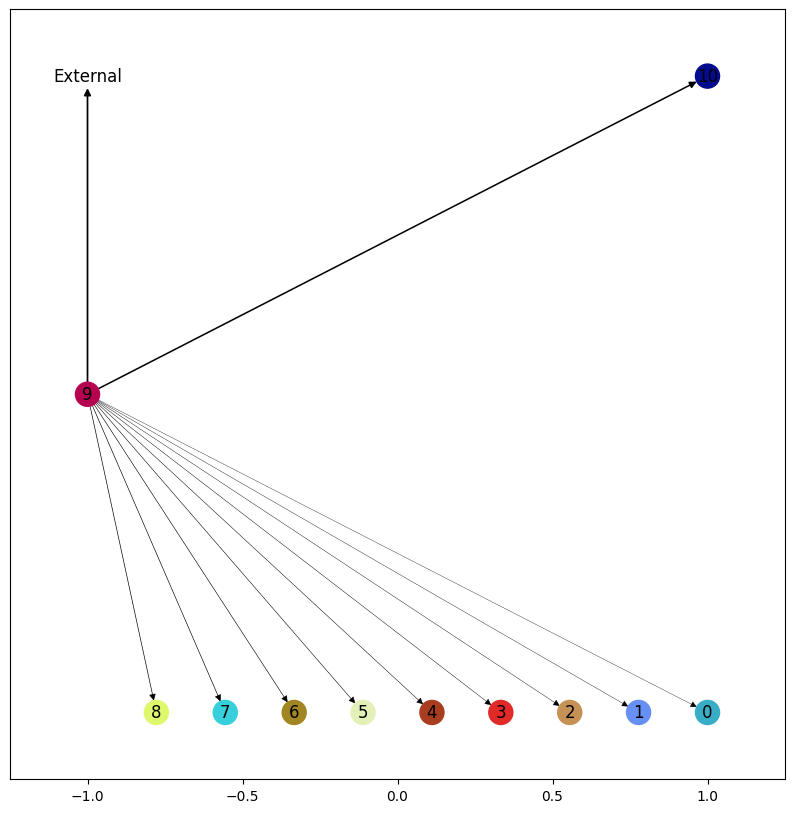

In [39]:
for consumer in content_market.consumers:
    visualize.visualize_consumer(content_market, stats.consumer_stats[consumer.index], agent_colors)

In [40]:
import importlib
importlib.reload(visualize)

<module 'visualize' from '/Users/gabeguralnick/git/content-market-experiment/visualize.py'>

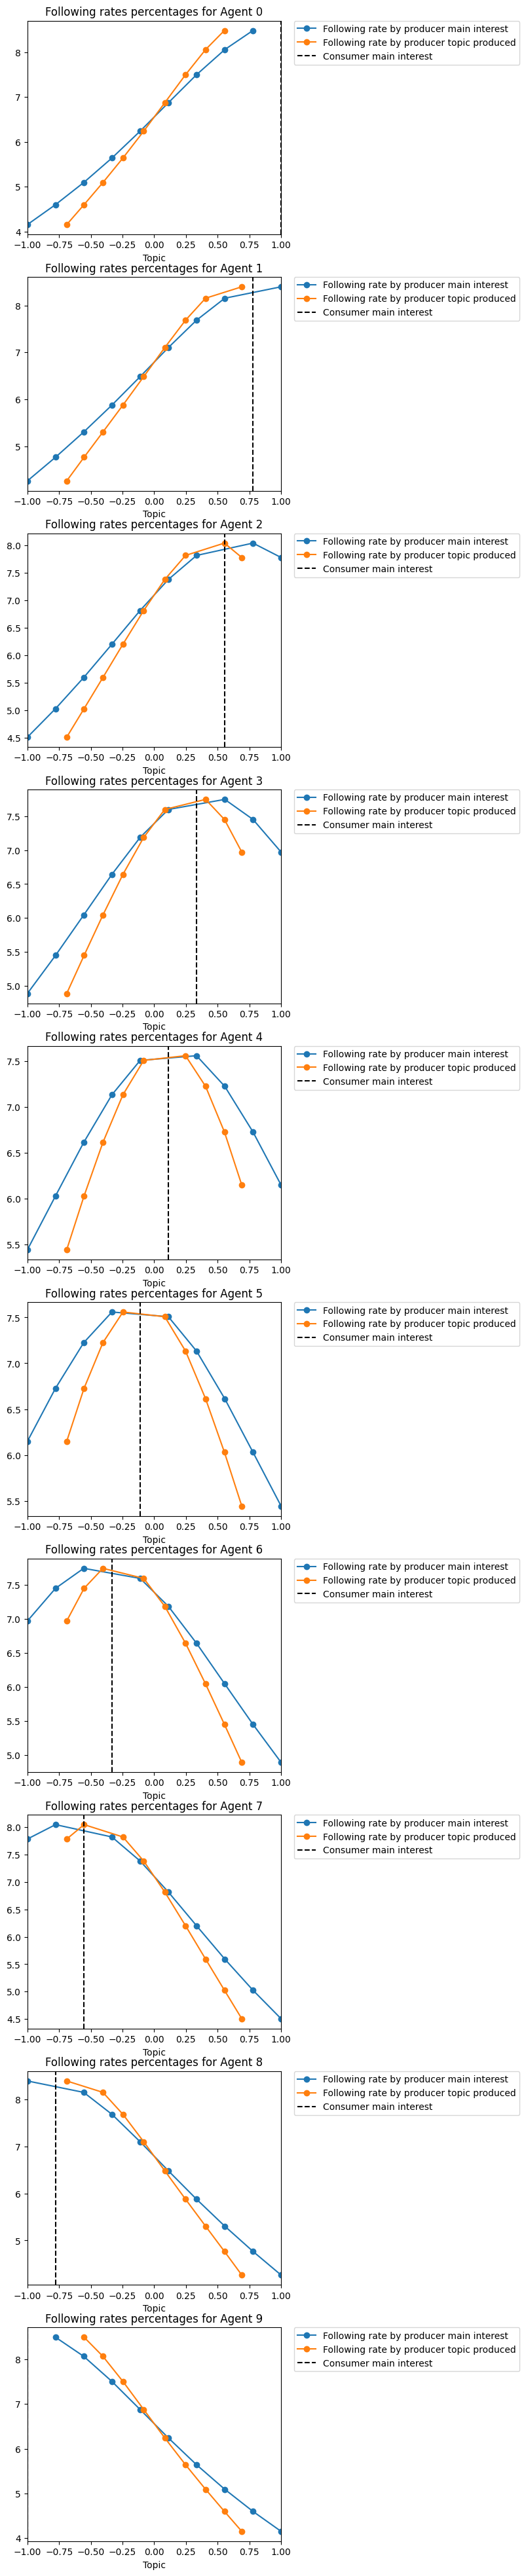

In [41]:
visualize.plot_agent_following_rates(content_market.consumers, stats.consumer_stats, agent_colors)

In [42]:
stats.to_dict()

{'num_iterations': 3,
 'total_consumer_utility': [0,
  140.21630785659562,
  140.25491583885793,
  140.25531833611637],
 'total_producer_utility': [0,
  88.15362129718822,
  88.27574789317114,
  88.27602629262658],
 'total_influencer_utility': [0,
  43.19069000838799,
  43.181831064159965,
  43.182782125969275],
 'total_social_welfare': [0,
  140.21630785659562,
  140.25491583885793,
  140.25531833611637],
 'average_consumer_rate_change': [0,
  5.654005941188741,
  0.3458071883102165,
  0.0],
 'average_producer_topic_change': [0,
  0.1646773162659628,
  0.00604416258475096,
  0.0015466551332163278],
 'average_influencer_rate_change': [0,
  1.3073030723082548,
  0.4445341822890571,
  0.0],
 'average_consumer_utility_change': [0,
  14.021630785659562,
  0.0038607982262325534,
  4.024972584311115e-05],
 'average_producer_utility_change': [0,
  8.815362129718823,
  0.012212659598291254,
  2.7839945543917112e-05],
 'average_influencer_utility_change': [0,
  43.19069000838799,
  -0.008858944

In [2]:
from stats import TestStats
stats = TestStats.from_dict({'num_iterations': 3,
 'total_consumer_utility': [0,
  140.21630785659562,
  140.25491583885793,
  140.25531833611637],
 'total_producer_utility': [0,
  88.15362129718822,
  88.27574789317114,
  88.27602629262658],
 'total_influencer_utility': [0,
  43.19069000838799,
  43.181831064159965,
  43.182782125969275],
 'total_social_welfare': [0,
  140.21630785659562,
  140.25491583885793,
  140.25531833611637],
 'average_consumer_rate_change': [0,
  5.654005941188741,
  0.3458071883102165,
  0.0],
 'average_producer_topic_change': [0,
  0.1646773162659628,
  0.00604416258475096,
  0.0015466551332163278],
 'average_influencer_rate_change': [0,
  1.3073030723082548,
  0.4445341822890571,
  0.0],
 'average_consumer_utility_change': [0,
  14.021630785659562,
  0.0038607982262325534,
  4.024972584311115e-05],
 'average_producer_utility_change': [0,
  8.815362129718823,
  0.012212659598291254,
  2.7839945543917112e-05],
 'average_influencer_utility_change': [0,
  43.19069000838799,
  -0.008858944228023802,
  0.0009510618093102607],
 'consumer_stats': {0: {'utilities': [0,
    11.504700218848134,
    11.529432414796446,
    11.523542761893687],
   'utility_change': [0,
    11.504700218848134,
    0.024732195948311997,
    -0.005889652902759224],
   'optimization_times': [0.14389920805115253,
    0.05562295799609274,
    0.004628291935659945],
   'agent': {'following_rates': {0: 0.0,
     1: 2.5464932832769325,
     2: 2.4184470080801215,
     3: 2.2503543746042993,
     4: 2.0622775611110784,
     5: 1.8721947164816166,
     6: 1.6922851182004677,
     7: 1.5280822624086867,
     8: 1.3800552117711689,
     9: 1.2459568890066164,
     10: 6.125188024468693,
     'external': 6.87866555059032},
    'index': 0,
    'optimize_tolerance': None,
    'main_interest': array([1.]),
    'attention_bound': 30,
    'external_interest_prob': 5,
    'delay_sensitivity': 0.57,
    'init_following_rates_method': 'equal',
    'topic_produced': array([0.69008173])},
   'index': 0,
   'following_rates': [array([0.        , 2.72727273, 2.72727273, 2.72727273, 2.72727273,
           2.72727273, 2.72727273, 2.72727273, 2.72727273, 2.72727273,
           2.72727273, 2.72727273]),
    array([0.        , 2.80836184, 2.60686199, 2.34239295, 2.06911147,
           1.81709141, 1.59635008, 1.4057551 , 1.23989142, 1.09297089,
           6.19046886, 6.83074398]),
    array([0.        , 2.54649328, 2.41844701, 2.25035437, 2.06227756,
           1.87219472, 1.69228512, 1.52808226, 1.38005521, 1.24595689,
           6.12518802, 6.87866555]),
    array([0.        , 2.54649328, 2.41844701, 2.25035437, 2.06227756,
           1.87219472, 1.69228512, 1.52808226, 1.38005521, 1.24595689,
           6.12518802, 6.87866555])],
   'attention_used': [29.999999999999996, 30.000000000000004, 30.0, 30.0],
   'rate_change': [0, 6.178321555479218, 0.4352076083455073, 0.0]},
  1: {'utilities': [0,
    12.966091787407592,
    12.98476953567175,
    12.981115172068158],
   'utility_change': [0,
    12.966091787407592,
    0.018677748264158467,
    -0.003654363603592614],
   'optimization_times': [0.05992633302230388,
    0.04358745797071606,
    0.004267624928615987],
   'agent': {'following_rates': {0: 2.519395481165404,
     1: 0.0,
     2: 2.446276478070089,
     3: 2.3060472805189716,
     4: 2.1309397683548275,
     5: 1.9453355540833577,
     6: 1.7635766467866307,
     7: 1.591643948409768,
     8: 1.4304808960218984,
     9: 1.278812143663279,
     10: 6.236551998126536,
     'external': 6.350939804799239},
    'index': 1,
    'optimize_tolerance': None,
    'main_interest': array([0.77777778]),
    'attention_bound': 30,
    'external_interest_prob': 5,
    'delay_sensitivity': 0.57,
    'init_following_rates_method': 'equal',
    'topic_produced': array([0.55284163])},
   'index': 1,
   'following_rates': [array([2.72727273, 0.        , 2.72727273, 2.72727273, 2.72727273,
           2.72727273, 2.72727273, 2.72727273, 2.72727273, 2.72727273,
           2.72727273, 2.72727273]),
    array([2.60979261, 0.        , 2.60979261, 2.42508324, 2.18050546,
           1.92431778, 1.68475017, 1.47361895, 1.29323211, 1.14126532,
           6.27439775, 6.38324398]),
    array([2.51939548, 0.        , 2.44627648, 2.30604728, 2.13093977,
           1.94533555, 1.76357665, 1.59164395, 1.4304809 , 1.27881214,
           6.236552  , 6.3509398 ]),
    array([2.51939548, 0.        , 2.44627648, 2.30604728, 2.13093977,
           1.94533555, 1.76357665, 1.59164395, 1.4304809 , 1.27881214,
           6.236552  , 6.3509398 ])],
   'attention_used': [29.999999999999996,
    29.999999999999996,
    30.000000000000004,
    30.000000000000004],
   'rate_change': [0, 5.85160042564855, 0.3351909337985718, 0.0]},
  2: {'utilities': [0,
    14.33650586714996,
    14.342391077724844,
    14.342014206972946],
   'utility_change': [0,
    14.33650586714996,
    0.0058852105748847805,
    -0.000376870751898295],
   'optimization_times': [0.06850545795168728,
    0.05460783408489078,
    0.004481667070649564],
   'agent': {'following_rates': {0: 2.3343705421216465,
     1: 2.413346093880791,
     2: 0.0,
     3: 2.345824976430042,
     4: 2.2142520096705596,
     5: 2.0447300107719313,
     6: 1.8602493117214183,
     7: 1.678118547881566,
     8: 1.507660608462405,
     9: 1.3511963726956815,
     10: 6.307313572261309,
     'external': 5.94293795410265},
    'index': 2,
    'optimize_tolerance': None,
    'main_interest': array([0.55555556]),
    'attention_bound': 30,
    'external_interest_prob': 5,
    'delay_sensitivity': 0.57,
    'init_following_rates_method': 'equal',
    'topic_produced': array([0.40436632])},
   'index': 2,
   'following_rates': [array([2.72727273, 2.72727273, 0.        , 2.72727273, 2.72727273,
           2.72727273, 2.72727273, 2.72727273, 2.72727273, 2.72727273,
           2.72727273, 2.72727273]),
    array([2.29660246, 2.47369627, 0.        , 2.47369627, 2.29660241,
           2.0624658 , 1.81789936, 1.59009842, 1.39024122, 1.22019295,
           6.31839284, 6.06011199]),
    array([2.33437054, 2.41334609, 0.        , 2.34582498, 2.21425201,
           2.04473001, 1.86024931, 1.67811855, 1.50766061, 1.35119637,
           6.30731357, 5.94293795]),
    array([2.33437054, 2.41334609, 0.        , 2.34582498, 2.21425201,
           2.04473001, 1.86024931, 1.67811855, 1.50766061, 1.35119637,
           6.30731357, 5.94293795])],
   'attention_used': [29.999999999999996,
    30.000000000000007,
    29.999999999999996,
    29.999999999999996],
   'rate_change': [0, 5.578938371200066, 0.287851631118859, 0.0]},
  3: {'utilities': [0,
    15.37531992693787,
    15.365646667328258,
    15.369295838912494],
   'utility_change': [0,
    15.37531992693787,
    -0.009673259609611407,
    0.003649171584235944],
   'optimization_times': [0.06539037497714162,
    0.056357583962380886,
    0.004044790985062718],
   'agent': {'following_rates': {0: 2.0908814250081793,
     1: 2.235402444936105,
     2: 2.3237440659030644,
     3: 0.0,
     4: 2.279277700127955,
     5: 2.1560666300968885,
     6: 1.9928012837094926,
     7: 1.8132813370764433,
     8: 1.6349148113474012,
     9: 1.4665004215474715,
     10: 6.343953693637322,
     'external': 5.663176186609677},
    'index': 3,
    'optimize_tolerance': None,
    'main_interest': array([0.33333333]),
    'attention_bound': 30,
    'external_interest_prob': 5,
    'delay_sensitivity': 0.57,
    'init_following_rates_method': 'equal',
    'topic_produced': array([0.24666598])},
   'index': 3,
   'following_rates': [array([2.72727273, 2.72727273, 2.72727273, 0.        , 2.72727273,
           2.72727273, 2.72727273, 2.72727273, 2.72727273, 2.72727273,
           2.72727273, 2.72727273]),
    array([1.98756046, 2.21613484, 2.38955341, 0.        , 2.38955381,
           2.21613484, 1.98756046, 1.75016044, 1.5308321 , 1.34024033,
           6.33072721, 5.86154211]),
    array([2.09088143, 2.23540244, 2.32374407, 0.        , 2.2792777 ,
           2.15606663, 1.99280128, 1.81328134, 1.63491481, 1.46650042,
           6.34395369, 5.66317619]),
    array([2.09088143, 2.23540244, 2.32374407, 0.        , 2.2792777 ,
           2.15606663, 1.99280128, 1.81328134, 1.63491481, 1.46650042,
           6.34395369, 5.66317619])],
   'attention_used': [29.999999999999996, 30.0, 30.0, 30.0],
   'rate_change': [0, 5.381782882983838, 0.31852292915613456, 0.0]},
  4: {'utilities': [0,
    15.925535800031827,
    15.905218041006998,
    15.91169099281122],
   'utility_change': [0,
    15.925535800031827,
    -0.02031775902482913,
    0.006472951804221694],
   'optimization_times': [0.07103883300442249,
    0.05916695902124047,
    0.004118792014196515],
   'agent': {'following_rates': {0: 1.8441578545126283,
     1: 2.0184414223058504,
     2: 2.167483769020336,
     3: 2.2677257016758072,
     4: 0.0,
     5: 2.252365015600292,
     6: 2.139903402133965,
     7: 1.9840617495683697,
     8: 1.809071639714708,
     9: 1.6324630551919677,
     10: 6.35754560984721,
     'external': 5.5267807804288624},
    'index': 4,
    'optimize_tolerance': None,
    'main_interest': array([0.11111111]),
    'attention_bound': 30,
    'external_interest_prob': 5,
    'delay_sensitivity': 0.57,
    'init_following_rates_method': 'equal',
    'topic_produced': array([0.08292303])},
   'index': 4,
   'following_rates': [array([2.72727273, 2.72727273, 2.72727273, 2.72727273, 0.        ,
           2.72727273, 2.72727273, 2.72727273, 2.72727273, 2.72727273,
           2.72727273, 2.72727273]),
    array([1.71815288, 1.95097297, 2.17725388, 2.34984365, 0.        ,
           2.34984365, 2.17725404, 1.95097299, 1.71815242, 1.50588276,
           6.33035144, 5.77131932]),
    array([1.84415785, 2.01844142, 2.16748377, 2.2677257 , 0.        ,
           2.25236502, 2.1399034 , 1.98406175, 1.80907164, 1.63246306,
           6.35754561, 5.52678078]),
    array([1.84415785, 2.01844142, 2.16748377, 2.2677257 , 0.        ,
           2.25236502, 2.1399034 , 1.98406175, 1.80907164, 1.63246306,
           6.35754561, 5.52678078])],
   'attention_used': [29.999999999999996,
    30.0,
    29.999999999999996,
    29.999999999999996],
   'rate_change': [0, 5.279400082588731, 0.3522606628676936, 0.0]},
  5: {'utilities': [0,
    15.925535803331229,
    15.905217868440037,
    15.91169082035951],
   'utility_change': [0,
    15.925535803331229,
    -0.02031793489119238,
    0.006472951919473502],
   'optimization_times': [0.06882933306042105,
    0.06858595903031528,
    0.004328500013798475],
   'agent': {'following_rates': {0: 1.6324658790959858,
     1: 1.8090715532759118,
     2: 1.9840606445779931,
     3: 2.1399035251170813,
     4: 2.252366170409961,
     5: 0.0,
     6: 2.2677274741912306,
     7: 2.16748359618435,
     8: 2.01843939983934,
     9: 1.8441574632317952,
     10: 6.357548979163803,
     'external': 5.526775314912544},
    'index': 5,
    'optimize_tolerance': None,
    'main_interest': array([-0.11111111]),
    'attention_bound': 30,
    'external_interest_prob': 5,
    'delay_sensitivity': 0.57,
    'init_following_rates_method': 'equal',
    'topic_produced': array([-0.08292304])},
   'index': 5,
   'following_rates': [array([2.72727273, 2.72727273, 2.72727273, 2.72727273, 2.72727273,
           0.        , 2.72727273, 2.72727273, 2.72727273, 2.72727273,
           2.72727273, 2.72727273]),
    array([1.50588318, 1.71815044, 1.95097191, 2.17725427, 2.34984731,
           0.        , 2.349847  , 2.17725427, 1.95097202, 1.71815076,
           6.33034631, 5.77132252]),
    array([1.63246588, 1.80907155, 1.98406064, 2.13990353, 2.25236617,
           0.        , 2.26772747, 2.1674836 , 2.0184394 , 1.84415746,
           6.35754898, 5.52677531]),
    array([1.63246588, 1.80907155, 1.98406064, 2.13990353, 2.25236617,
           0.        , 2.26772747, 2.1674836 , 2.0184394 , 1.84415746,
           6.35754898, 5.52677531])],
   'attention_used': [29.999999999999996,
    29.999999999999996,
    29.999999999999996,
    29.999999999999996],
   'rate_change': [0, 5.279398849397807, 0.3522701889526818, 0.0]},
  6: {'utilities': [0,
    15.375319998609838,
    15.365646963166908,
    15.369296126386246],
   'utility_change': [0,
    15.375319998609838,
    -0.009673035442929745,
    0.0036491632193378365],
   'optimization_times': [0.07705879199784249,
    0.07082949997857213,
    0.0040259589441120625],
   'agent': {'following_rates': {0: 1.4664988502483793,
     1: 1.634914210062107,
     2: 1.8132817649806852,
     3: 1.9928007357395376,
     4: 2.1560661491622657,
     5: 2.2792772763546996,
     6: 0.0,
     7: 2.32374310145782,
     8: 2.235402008994562,
     9: 2.090881772093009,
     10: 6.343952842038918,
     'external': 5.663181288868018},
    'index': 6,
    'optimize_tolerance': None,
    'main_interest': array([-0.33333333]),
    'attention_bound': 30,
    'external_interest_prob': 5,
    'delay_sensitivity': 0.57,
    'init_following_rates_method': 'equal',
    'topic_produced': array([-0.24666598])},
   'index': 6,
   'following_rates': [array([2.72727273, 2.72727273, 2.72727273, 2.72727273, 2.72727273,
           2.72727273, 0.        , 2.72727273, 2.72727273, 2.72727273,
           2.72727273, 2.72727273]),
    array([1.34023661, 1.53082903, 1.75015944, 1.98755973, 2.2161384 ,
           2.3895579 , 0.        , 2.3895579 , 2.21613843, 1.98756055,
           6.33072063, 5.86154138]),
    array([1.46649885, 1.63491421, 1.81328176, 1.99280074, 2.15606615,
           2.27927728, 0.        , 2.3237431 , 2.23540201, 2.09088177,
           6.34395284, 5.66318129]),
    array([1.46649885, 1.63491421, 1.81328176, 1.99280074, 2.15606615,
           2.27927728, 0.        , 2.3237431 , 2.23540201, 2.09088177,
           6.34395284, 5.66318129])],
   'attention_used': [29.999999999999996, 30.0, 30.0, 30.0],
   'rate_change': [0, 5.381778743387214, 0.3185247745590551, 0.0]},
  7: {'utilities': [0,
    14.336506009007923,
    14.342390923098908,
    14.342014050964075],
   'utility_change': [0,
    14.336506009007923,
    0.005884914090984239,
    -0.0003768721348329507],
   'optimization_times': [0.08455195801798254,
    0.06985841691493988,
    0.003953124978579581],
   'agent': {'following_rates': {0: 1.3511973834700097,
     1: 1.5076609021917864,
     2: 1.678119456206847,
     3: 1.8602500705073217,
     4: 2.0447284159148365,
     5: 2.214250563503812,
     6: 2.3458249290887405,
     7: 0.0,
     8: 2.4133448340344885,
     9: 2.33436818368322,
     10: 6.307310071689925,
     'external': 5.942945189709015},
    'index': 7,
    'optimize_tolerance': None,
    'main_interest': array([-0.55555556]),
    'attention_bound': 30,
    'external_interest_prob': 5,
    'delay_sensitivity': 0.57,
    'init_following_rates_method': 'equal',
    'topic_produced': array([-0.40436635])},
   'index': 7,
   'following_rates': [array([2.72727273, 2.72727273, 2.72727273, 2.72727273, 2.72727273,
           2.72727273, 2.72727273, 0.        , 2.72727273, 2.72727273,
           2.72727273, 2.72727273]),
    array([1.22019078, 1.39024099, 1.59009849, 1.81789994, 2.06246766,
           2.29660465, 2.47369779, 0.        , 2.47369738, 2.29660391,
           6.3183888 , 6.0601096 ]),
    array([1.35119738, 1.5076609 , 1.67811946, 1.86025007, 2.04472842,
           2.21425056, 2.34582493, 0.        , 2.41334483, 2.33436818,
           6.30731007, 5.94294519]),
    array([1.35119738, 1.5076609 , 1.67811946, 1.86025007, 2.04472842,
           2.21425056, 2.34582493, 0.        , 2.41334483, 2.33436818,
           6.30731007, 5.94294519])],
   'attention_used': [29.999999999999996,
    30.0,
    30.000000000000004,
    30.000000000000004],
   'rate_change': [0, 5.578934248182742, 0.2878515959782698, 0.0]},
  8: {'utilities': [0,
    12.966091819660154,
    12.98476977324069,
    12.981115423742501],
   'utility_change': [0,
    12.966091819660154,
    0.0186779535805357,
    -0.00365434949818777],
   'optimization_times': [0.08936583297327161,
    0.045156790991313756,
    0.004083790932781994],
   'agent': {'following_rates': {0: 1.2788111436239613,
     1: 1.430480321851893,
     2: 1.5916436017855602,
     3: 1.7635773070172076,
     4: 1.9453371510519217,
     5: 2.1309403525348265,
     6: 2.3060484349439827,
     7: 2.446277044853316,
     8: 0.0,
     9: 2.5193965134083443,
     10: 6.236549350658566,
     'external': 6.35093877827042},
    'index': 8,
    'optimize_tolerance': None,
    'main_interest': array([-0.77777778]),
    'attention_bound': 30,
    'external_interest_prob': 5,
    'delay_sensitivity': 0.57,
    'init_following_rates_method': 'equal',
    'topic_produced': array([-0.55284165])},
   'index': 8,
   'following_rates': [array([2.72727273, 2.72727273, 2.72727273, 2.72727273, 2.72727273,
           2.72727273, 2.72727273, 2.72727273, 0.        , 2.72727273,
           2.72727273, 2.72727273]),
    array([1.14126621, 1.29323246, 1.47361846, 1.68474938, 1.92431925,
           2.18050581, 2.42508454, 2.60979513, 0.        , 2.60979513,
           6.27439491, 6.3832387 ]),
    array([1.27881114, 1.43048032, 1.5916436 , 1.76357731, 1.94533715,
           2.13094035, 2.30604843, 2.44627704, 0.        , 2.51939651,
           6.23654935, 6.35093878]),
    array([1.27881114, 1.43048032, 1.5916436 , 1.76357731, 1.94533715,
           2.13094035, 2.30604843, 2.44627704, 0.        , 2.51939651,
           6.23654935, 6.35093878])],
   'attention_used': [29.999999999999996, 30.0, 30.0, 30.0],
   'rate_change': [0, 5.851594923002067, 0.3351911196234248, 0.0]},
  9: {'utilities': [0,
    11.50470062561109,
    11.529432574383103,
    11.523542942005536],
   'utility_change': [0,
    11.50470062561109,
    0.024731948772013013,
    -0.005889632377567011],
   'optimization_times': [0.09459895908366889,
    0.07690916699357331,
    0.003906750003807247],
   'agent': {'following_rates': {0: 1.24595272051396,
     1: 1.3800555855126524,
     2: 1.5280839037445857,
     3: 1.692287006937947,
     4: 1.8721981347976318,
     5: 2.0622795206822944,
     6: 2.2503539851223233,
     7: 2.4184491542937776,
     8: 2.5464959798270725,
     9: 0.0,
     10: 6.125190935390123,
     'external': 6.878653073177634},
    'index': 9,
    'optimize_tolerance': None,
    'main_interest': array([-1.]),
    'attention_bound': 30,
    'external_interest_prob': 5,
    'delay_sensitivity': 0.57,
    'init_following_rates_method': 'equal',
    'topic_produced': array([-0.69008175])},
   'index': 9,
   'following_rates': [array([2.72727273, 2.72727273, 2.72727273, 2.72727273, 2.72727273,
           2.72727273, 2.72727273, 2.72727273, 2.72727273, 0.        ,
           2.72727273, 2.72727273]),
    array([1.09297445, 1.23989692, 1.40576056, 1.59635085, 1.81709144,
           2.06911009, 2.34239067, 2.60686153, 2.80836444, 0.        ,
           6.19046704, 6.830732  ]),
    array([1.24595272, 1.38005559, 1.5280839 , 1.69228701, 1.87219813,
           2.06227952, 2.25035399, 2.41844915, 2.54649598, 0.        ,
           6.12519094, 6.87865307]),
    array([1.24595272, 1.38005559, 1.5280839 , 1.69228701, 1.87219813,
           2.06227952, 2.25035399, 2.41844915, 2.54649598, 0.        ,
           6.12519094, 6.87865307])],
   'attention_used': [29.999999999999996, 29.999999999999996, 30.0, 30.0],
   'rate_change': [0, 6.178309330017171, 0.43520043870196723, 0.0]}},
 'producer_stats': {0: {'utilities': [0,
    7.398786288634105,
    7.496927782811186,
    7.496951320288225],
   'utility_change': [0,
    7.398786288634105,
    0.09814149417708062,
    2.353747703942588e-05],
   'optimization_times': [0.004425875027664006,
    0.0033615840366110206,
    0.002949667046777904],
   'agent': {'following_rates': {0: 0.0,
     1: 2.5464932832769325,
     2: 2.4184470080801215,
     3: 2.2503543746042993,
     4: 2.0622775611110784,
     5: 1.8721947164816166,
     6: 1.6922851182004677,
     7: 1.5280822624086867,
     8: 1.3800552117711689,
     9: 1.2459568890066164,
     10: 6.125188024468693,
     'external': 6.87866555059032},
    'index': 0,
    'optimize_tolerance': None,
    'main_interest': array([1.]),
    'attention_bound': 30,
    'external_interest_prob': 5,
    'delay_sensitivity': 0.57,
    'init_following_rates_method': 'equal',
    'topic_produced': array([0.69008173])},
   'index': 0,
   'topics': [array([1.]),
    array([0.68427981]),
    array([0.69172451]),
    array([0.69008173])],
   'topic_change': [0,
    0.31572018961467874,
    0.0074446959471212715,
    0.0016427749513021617],
   'topic_distance': [0.0,
    0.31572018961467874,
    0.30827549366755747,
    0.3099182686188596]},
  1: {'utilities': [0,
    8.305707586079915,
    8.347764452196005,
    8.347813930850165],
   'utility_change': [0,
    8.305707586079915,
    0.04205686611608961,
    4.947865416049524e-05],
   'optimization_times': [0.004314832971431315,
    0.00335900008212775,
    0.004970000009052455],
   'agent': {'following_rates': {0: 2.519395481165404,
     1: 0.0,
     2: 2.446276478070089,
     3: 2.3060472805189716,
     4: 2.1309397683548275,
     5: 1.9453355540833577,
     6: 1.7635766467866307,
     7: 1.591643948409768,
     8: 1.4304808960218984,
     9: 1.278812143663279,
     10: 6.236551998126536,
     'external': 6.350939804799239},
    'index': 1,
    'optimize_tolerance': None,
    'main_interest': array([0.77777778]),
    'attention_bound': 30,
    'external_interest_prob': 5,
    'delay_sensitivity': 0.57,
    'init_following_rates_method': 'equal',
    'topic_produced': array([0.55284163])},
   'index': 1,
   'topics': [array([0.77777778]),
    array([0.54667554]),
    array([0.55508294]),
    array([0.55284163])],
   'topic_change': [0,
    0.2311022394203115,
    0.008407405190106187,
    0.0022413132796422763],
   'topic_distance': [0.0,
    0.2311022394203115,
    0.2226948342302053,
    0.22493614750984758]},
  2: {'utilities': [0, 9.035007506898829, 9.03325065509668, 9.03329386269531],
   'utility_change': [0,
    9.035007506898829,
    -0.0017568518021491286,
    4.320759862963541e-05],
   'optimization_times': [0.004174542031250894,
    0.0028347079642117023,
    0.0029279999434947968],
   'agent': {'following_rates': {0: 2.3343705421216465,
     1: 2.413346093880791,
     2: 0.0,
     3: 2.345824976430042,
     4: 2.2142520096705596,
     5: 2.0447300107719313,
     6: 1.8602493117214183,
     7: 1.678118547881566,
     8: 1.507660608462405,
     9: 1.3511963726956815,
     10: 6.307313572261309,
     'external': 5.94293795410265},
    'index': 2,
    'optimize_tolerance': None,
    'main_interest': array([0.55555556]),
    'attention_bound': 30,
    'external_interest_prob': 5,
    'delay_sensitivity': 0.57,
    'init_following_rates_method': 'equal',
    'topic_produced': array([0.40436632])},
   'index': 2,
   'topics': [array([0.55555556]),
    array([0.39890854]),
    array([0.4063828]),
    array([0.40436632])],
   'topic_change': [0,
    0.1566470128306512,
    0.007474260851292602,
    0.002016478650363085],
   'topic_distance': [0.0,
    0.1566470128306512,
    0.1491727519793586,
    0.15118923062972167]},
  3: {'utilities': [0,
    9.540156894979111,
    9.508780014986792,
    9.508800443591067],
   'utility_change': [0,
    9.540156894979111,
    -0.03137687999231886,
    2.0428604274869144e-05],
   'optimization_times': [0.0032155420631170273,
    0.0026335420552641153,
    0.0028078750474378467],
   'agent': {'following_rates': {0: 2.0908814250081793,
     1: 2.235402444936105,
     2: 2.3237440659030644,
     3: 0.0,
     4: 2.279277700127955,
     5: 2.1560666300968885,
     6: 1.9928012837094926,
     7: 1.8132813370764433,
     8: 1.6349148113474012,
     9: 1.4665004215474715,
     10: 6.343953693637322,
     'external': 5.663176186609677},
    'index': 3,
    'optimize_tolerance': None,
    'main_interest': array([0.33333333]),
    'attention_bound': 30,
    'external_interest_prob': 5,
    'delay_sensitivity': 0.57,
    'init_following_rates_method': 'equal',
    'topic_produced': array([0.24666598])},
   'index': 3,
   'topics': [array([0.33333333]),
    array([0.2429304]),
    array([0.24802367]),
    array([0.24666598])],
   'topic_change': [0,
    0.09040293763001006,
    0.005093277354009801,
    0.0013576881947397756],
   'topic_distance': [0.0,
    0.09040293763001006,
    0.08530966027600026,
    0.08666734847074004]},
  4: {'utilities': [0,
    9.797150342499354,
    9.751149569523974,
    9.751152116771989],
   'utility_change': [0,
    9.797150342499354,
    -0.04600077297537908,
    2.547248014295178e-06],
   'optimization_times': [0.005090415943413973,
    0.002534249913878739,
    0.0024655000306665897],
   'agent': {'following_rates': {0: 1.8441578545126283,
     1: 2.0184414223058504,
     2: 2.167483769020336,
     3: 2.2677257016758072,
     4: 0.0,
     5: 2.252365015600292,
     6: 2.139903402133965,
     7: 1.9840617495683697,
     8: 1.809071639714708,
     9: 1.6324630551919677,
     10: 6.35754560984721,
     'external': 5.5267807804288624},
    'index': 4,
    'optimize_tolerance': None,
    'main_interest': array([0.11111111]),
    'attention_bound': 30,
    'external_interest_prob': 5,
    'delay_sensitivity': 0.57,
    'init_following_rates_method': 'equal',
    'topic_produced': array([0.08292303])},
   'index': 4,
   'topics': [array([0.11111111]),
    array([0.08159688]),
    array([0.08339806]),
    array([0.08292303])],
   'topic_change': [0,
    0.029514232623157194,
    0.0018011773886485866,
    0.0004750297584294183],
   'topic_distance': [0.0,
    0.029514232623157194,
    0.027713055234508607,
    0.028188084992938026]},
  5: {'utilities': [0,
    9.797149681058375,
    9.751151455186921,
    9.751154002777756],
   'utility_change': [0,
    9.797149681058375,
    -0.04599822587145397,
    2.547590835177971e-06],
   'optimization_times': [0.004777541966177523,
    0.0025164159014821053,
    0.0020710419630631804],
   'agent': {'following_rates': {0: 1.6324658790959858,
     1: 1.8090715532759118,
     2: 1.9840606445779931,
     3: 2.1399035251170813,
     4: 2.252366170409961,
     5: 0.0,
     6: 2.2677274741912306,
     7: 2.16748359618435,
     8: 2.01843939983934,
     9: 1.8441574632317952,
     10: 6.357548979163803,
     'external': 5.526775314912544},
    'index': 5,
    'optimize_tolerance': None,
    'main_interest': array([-0.11111111]),
    'attention_bound': 30,
    'external_interest_prob': 5,
    'delay_sensitivity': 0.57,
    'init_following_rates_method': 'equal',
    'topic_produced': array([-0.08292304])},
   'index': 5,
   'topics': [array([-0.11111111]),
    array([-0.08159691]),
    array([-0.08339809]),
    array([-0.08292304])],
   'topic_change': [0,
    0.02951420202099185,
    0.0018011846918332408,
    0.0004750493274448403],
   'topic_distance': [0.0,
    0.02951420202099185,
    0.02771301732915861,
    0.02818806665660345]},
  6: {'utilities': [0, 9.540157314813555, 9.50877856417159, 9.508798992262104],
   'utility_change': [0,
    9.540157314813555,
    -0.031378750641964714,
    2.042809051339134e-05],
   'optimization_times': [0.0032743329647928476,
    0.002691666944883764,
    0.0027749580331146717],
   'agent': {'following_rates': {0: 1.4664988502483793,
     1: 1.634914210062107,
     2: 1.8132817649806852,
     3: 1.9928007357395376,
     4: 2.1560661491622657,
     5: 2.2792772763546996,
     6: 0.0,
     7: 2.32374310145782,
     8: 2.235402008994562,
     9: 2.090881772093009,
     10: 6.343952842038918,
     'external': 5.663181288868018},
    'index': 6,
    'optimize_tolerance': None,
    'main_interest': array([-0.33333333]),
    'attention_bound': 30,
    'external_interest_prob': 5,
    'delay_sensitivity': 0.57,
    'init_following_rates_method': 'equal',
    'topic_produced': array([-0.24666598])},
   'index': 6,
   'topics': [array([-0.33333333]),
    array([-0.24293042]),
    array([-0.24802366]),
    array([-0.24666598])],
   'topic_change': [0,
    0.0904029164711431,
    0.005093244748247017,
    0.0013576782458089576],
   'topic_distance': [0.0,
    0.0904029164711431,
    0.08530967172289608,
    0.08666734996870504]},
  7: {'utilities': [0,
    9.035008972005492,
    9.033253864377318,
    9.033297072110003],
   'utility_change': [0,
    9.035008972005492,
    -0.0017551076281741018,
    4.3207732684180655e-05],
   'optimization_times': [0.004083167063072324,
    0.002702041994780302,
    0.005912791937589645],
   'agent': {'following_rates': {0: 1.3511973834700097,
     1: 1.5076609021917864,
     2: 1.678119456206847,
     3: 1.8602500705073217,
     4: 2.0447284159148365,
     5: 2.214250563503812,
     6: 2.3458249290887405,
     7: 0.0,
     8: 2.4133448340344885,
     9: 2.33436818368322,
     10: 6.307310071689925,
     'external': 5.942945189709015},
    'index': 7,
    'optimize_tolerance': None,
    'main_interest': array([-0.55555556]),
    'attention_bound': 30,
    'external_interest_prob': 5,
    'delay_sensitivity': 0.57,
    'init_following_rates_method': 'equal',
    'topic_produced': array([-0.40436635])},
   'index': 7,
   'topics': [array([-0.55555556]),
    array([-0.39890854]),
    array([-0.40638281]),
    array([-0.40436635])],
   'topic_change': [0,
    0.15664701780461698,
    0.007474276744690422,
    0.002016465661134337],
   'topic_distance': [0.0,
    0.15664701780461698,
    0.14917274105992656,
    0.1511892067210609]},
  8: {'utilities': [0, 8.305710342114256, 8.34776382878202, 8.34781330740298],
   'utility_change': [0,
    8.305710342114256,
    0.042053486667763096,
    4.947862096038591e-05],
   'optimization_times': [0.004630082985386252,
    0.0031647919677197933,
    0.004052833071909845],
   'agent': {'following_rates': {0: 1.2788111436239613,
     1: 1.430480321851893,
     2: 1.5916436017855602,
     3: 1.7635773070172076,
     4: 1.9453371510519217,
     5: 2.1309403525348265,
     6: 2.3060484349439827,
     7: 2.446277044853316,
     8: 0.0,
     9: 2.5193965134083443,
     10: 6.236549350658566,
     'external': 6.35093877827042},
    'index': 8,
    'optimize_tolerance': None,
    'main_interest': array([-0.77777778]),
    'attention_bound': 30,
    'external_interest_prob': 5,
    'delay_sensitivity': 0.57,
    'init_following_rates_method': 'equal',
    'topic_produced': array([-0.55284165])},
   'index': 8,
   'topics': [array([-0.77777778]),
    array([-0.54667555]),
    array([-0.55508295]),
    array([-0.55284165])],
   'topic_change': [0,
    0.23110222992692087,
    0.008407404061580581,
    0.0022413053657617255],
   'topic_distance': [0.0,
    0.23110222992692087,
    0.22269482586534028,
    0.224936131231102]},
  9: {'utilities': [0,
    7.398786368105233,
    7.496927706038652,
    7.496951243876979],
   'utility_change': [0,
    7.398786368105233,
    0.09814133793341906,
    2.3537838327314375e-05],
   'optimization_times': [0.0038738750154152513,
    0.0034058329183608294,
    0.007346999947912991],
   'agent': {'following_rates': {0: 1.24595272051396,
     1: 1.3800555855126524,
     2: 1.5280839037445857,
     3: 1.692287006937947,
     4: 1.8721981347976318,
     5: 2.0622795206822944,
     6: 2.2503539851223233,
     7: 2.4184491542937776,
     8: 2.5464959798270725,
     9: 0.0,
     10: 6.125190935390123,
     'external': 6.878653073177634},
    'index': 9,
    'optimize_tolerance': None,
    'main_interest': array([-1.]),
    'attention_bound': 30,
    'external_interest_prob': 5,
    'delay_sensitivity': 0.57,
    'init_following_rates_method': 'equal',
    'topic_produced': array([-0.69008175])},
   'index': 9,
   'topics': [array([-1.]),
    array([-0.68427982]),
    array([-0.69172451]),
    array([-0.69008175])],
   'topic_change': [0,
    0.31572018431714677,
    0.007444698869979893,
    0.001642767897536701],
   'topic_distance': [0.0,
    0.31572018431714677,
    0.3082754854471669,
    0.3099182533447036]}},
 'influencer_stats': {10: {'utilities': [0,
    43.19069000838799,
    43.181831064159965,
    43.182782125969275],
   'utility_change': [0,
    43.19069000838799,
    -0.008858944228023802,
    0.0009510618093102607],
   'optimization_times': [0.10273529205005616,
    0.08716904104221612,
    0.016513958922587335],
   'agent': {'following_rates': {0: 5.558831296016577,
     1: 5.837563186704324,
     2: 6.066830296962631,
     3: 6.2274269747966375,
     4: 6.309334258917828,
     5: 6.309352516719743,
     6: 6.227414615233719,
     7: 6.0668568723379295,
     8: 5.8375586815568905,
     9: 5.558831300753721,
     10: 0.0,
     'external': 0.0},
    'index': 10,
    'optimize_tolerance': None,
    'attention_bound': 60,
    'delay_sensitivity': 1,
    'init_following_rates_method': 'equal'},
   'index': 10,
   'following_rates': [array([6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 0., 0.]),
    array([5.32092815, 5.76658489, 6.11281884, 6.34303206, 6.45662308,
           6.45662012, 6.34303252, 6.11282862, 5.76660404, 5.32092769,
           0.        , 0.        ]),
    array([5.5588313 , 5.83756319, 6.0668303 , 6.22742697, 6.30933426,
           6.30935252, 6.22741462, 6.06685687, 5.83755868, 5.5588313 ,
           0.        , 0.        ]),
    array([5.5588313 , 5.83756319, 6.0668303 , 6.22742697, 6.30933426,
           6.30935252, 6.22741462, 6.06685687, 5.83755868, 5.5588313 ,
           0.        , 0.        ])],
   'attention_used': [60.0, 60.0, 60.00000000000001, 60.00000000000001],
   'rate_change': [0, 1.3073030723082548, 0.4445341822890571, 0.0]}},
 'optimization_time': 1.814844417036511,
 'optimization_times': [0.9679440839681774,
  0.7171741250203922,
  0.097151166992262],
 'market': {'topics_bounds': array([[-1,  1]]),
  'production_rate': 1,
  'external_production_rate': 1}})

NameError: name 'TestStats' is not defined